In [1]:
import datetime, math
import numpy as np
import pandas as pd
from tqdm import tqdm
import yaml
import seaborn as sns
import matplotlib.pyplot as plt, matplotlib.dates as mdates
import matplotlib.ticker as mtick
import os
import random
# from statsmodels.stats.weightstats import DescrStatsW

# check if dir exist if not create it
def check_dir(file_name):
    directory = os.path.dirname(file_name)
    if not os.path.exists(directory):
        os.makedirs(directory)
    print(file_name)

### Read pre-processed data

In [2]:
time_window = 120
version = 'v0.11'
fig_version = 'v0.11'

proj_path = '..'

In [3]:
data = pd.read_csv(proj_path + '/Data/model_dataset_admin1_D_date.csv', index_col=0)
data['date_2'] = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in data['date_2']]

data.dtypes

date_2                                                    datetime64[ns]
admin1Pcod_2                                                      object
admin1Name_2                                                      object
trip_num                                                           int64
tour_num                                                           int64
id_num                                                             int64
tour_traj_distance_1                                             float64
tour_traj_distance_2                                             float64
trip_traj_distance_1                                             float64
trip_traj_distance_2                                             float64
time_range                                                         int64
date                                                               int64
trip_miles/person                                                float64
miles/person                                       

In [4]:
data['date_2']

0      2020-01-01
1      2020-01-01
2      2020-01-01
3      2020-01-01
4      2020-01-01
          ...    
3650   2020-12-31
3651   2020-12-31
3652   2020-12-31
3653   2020-12-31
3654   2020-12-31
Name: date_2, Length: 3294, dtype: datetime64[ns]

### Visualize trend of metrics

#### trip number

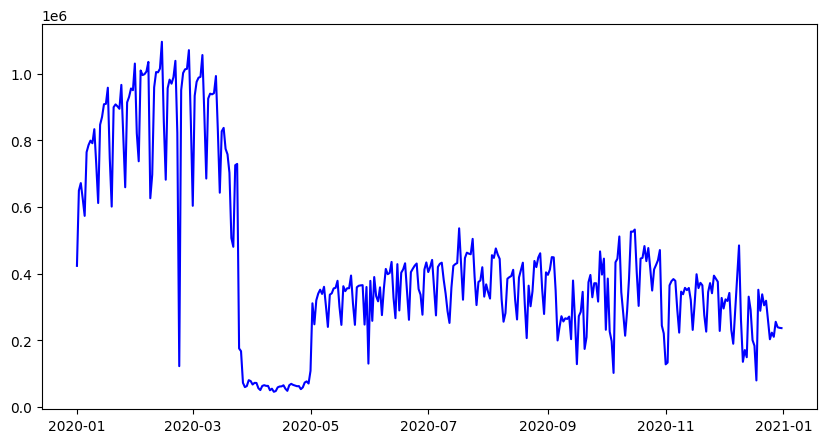

In [5]:
daily_temp = data.groupby('date_2')['trip_num'].sum().to_frame().reset_index()
# daily_temp['date_2'] = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in daily_temp['date_2']]
daily_temp

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_temp['date_2'], daily_temp['trip_num'], color='blue')

#### ID number

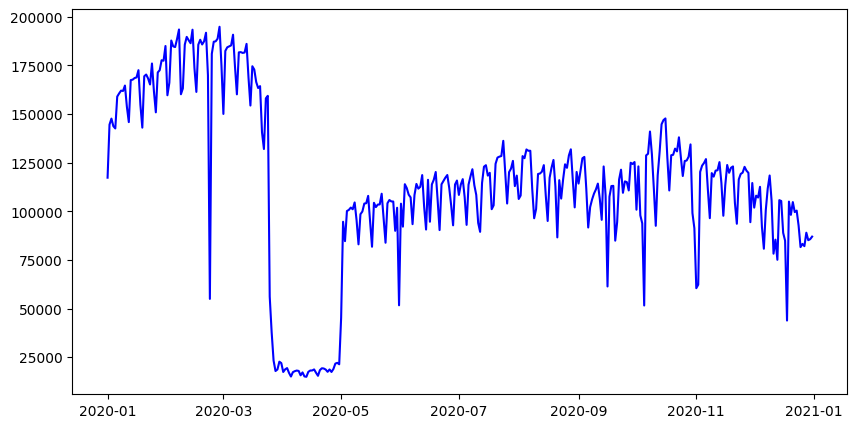

In [6]:
daily_temp = data.groupby('date_2')['id_num'].sum().to_frame().reset_index()
# daily_temp['date_2'] = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in daily_temp['date_2']]
daily_temp

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_temp['date_2'], daily_temp['id_num'], color='blue')

#### trips/person

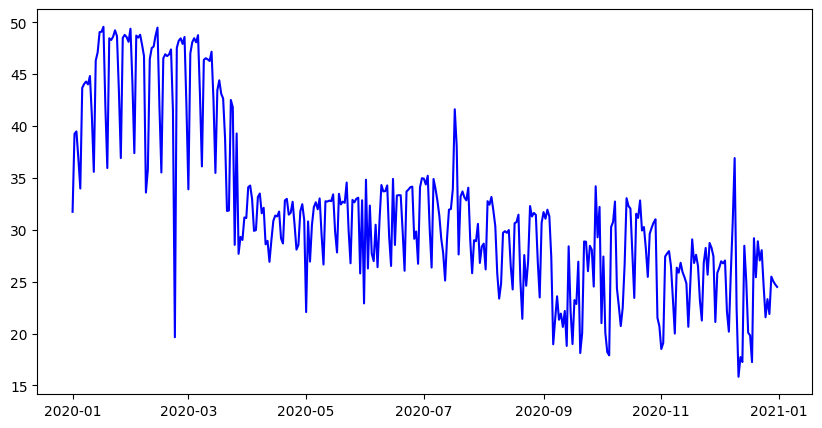

In [7]:
daily_temp = data.groupby('date_2')['trips/person'].sum().to_frame().reset_index()
# daily_temp['date_2'] = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in daily_temp['date_2']]
daily_temp

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_temp['date_2'], daily_temp['trips/person'], color='blue')

#### new cases

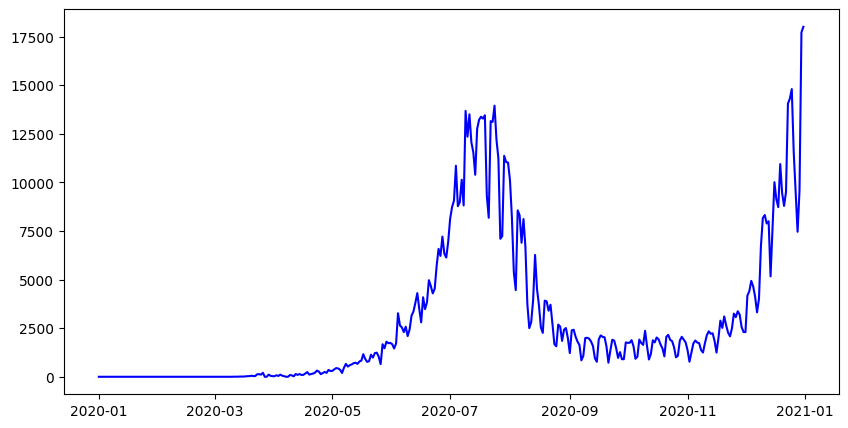

In [8]:
daily_new_cases = data.groupby('date_2')['new_cases'].sum().to_frame().reset_index()
# daily_new_cases['date_2'] = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in daily_new_cases['date_2']]
daily_new_cases

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_new_cases['date_2'], daily_new_cases['new_cases'], color='blue')

#### admin1_inflow_trip_count

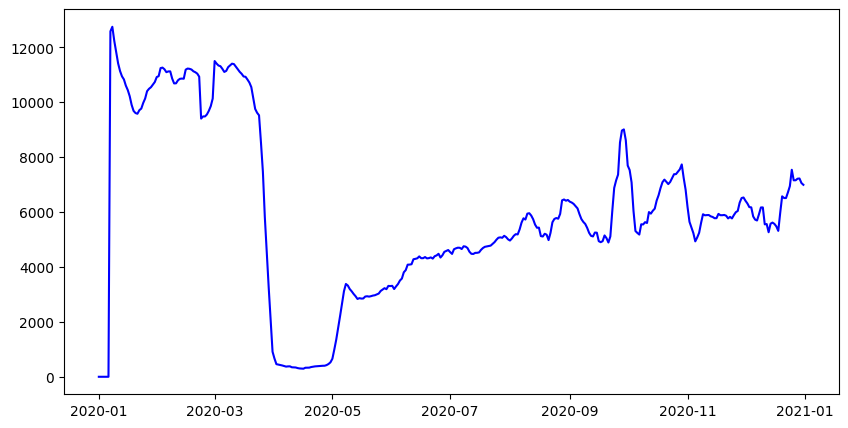

In [9]:
data['MA7.admin1_inflow_trip_count'] = data.groupby('admin1Pcod_2')['admin1_inflow_trip_count'].transform(lambda x: x.rolling(7).mean())
baseline = data.loc[data['date_2'] <= datetime.datetime(2020,1,31)].groupby('admin1Pcod_2')['admin1_inflow_trip_count']

daily_temp = data.groupby('date_2')['MA7.admin1_inflow_trip_count'].sum().to_frame().reset_index()
# daily_temp['date_2'] = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in daily_temp['date_2']]
daily_temp

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inflow_trip_count'], color='blue')

#### admin1_inbound_admin2_crossbound_trip_count

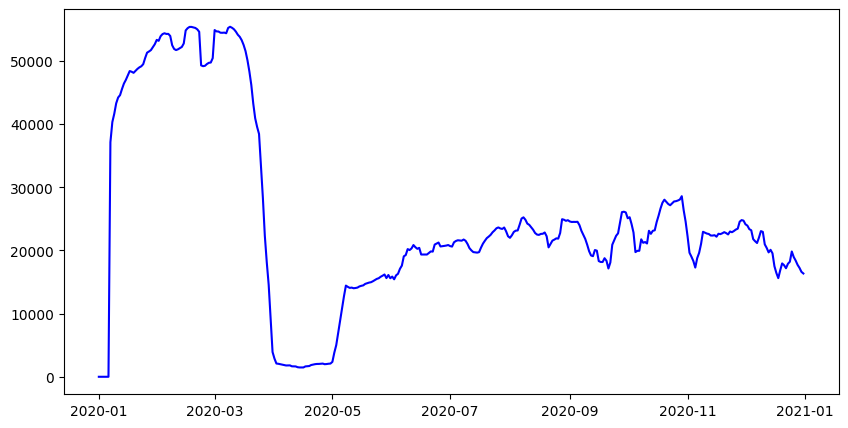

In [10]:
data['MA7.admin1_inbound_admin2_crossbound_trip_count'] = data.groupby('admin1Pcod_2')['admin1_inbound_admin2_crossbound_trip_count'].transform(lambda x: x.rolling(7).mean())

daily_temp = data.groupby('date_2')['MA7.admin1_inbound_admin2_crossbound_trip_count'].sum().to_frame().reset_index()
daily_temp

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inbound_admin2_crossbound_trip_count'], color='blue')

#### admin2_inbound_trip_count

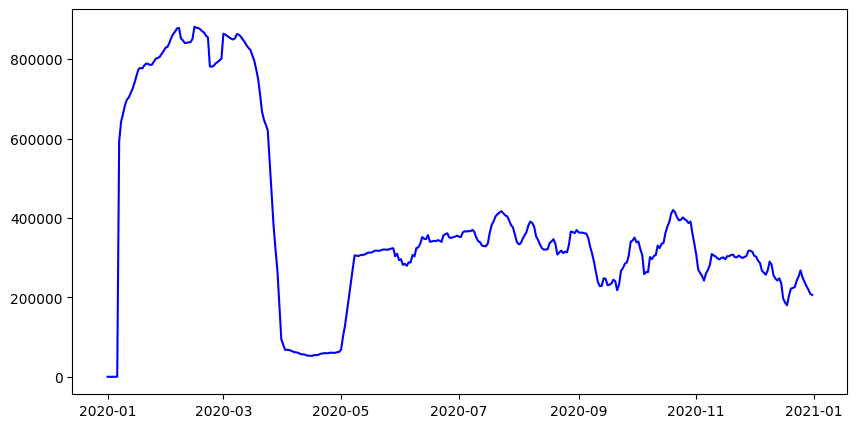

In [11]:
data['MA7.admin2_inbound_trip_count'] = data.groupby('admin1Pcod_2')['admin2_inbound_trip_count'].transform(lambda x: x.rolling(7).mean())

daily_temp = data.groupby('date_2')['MA7.admin2_inbound_trip_count'].sum().to_frame().reset_index()
daily_temp

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_temp['date_2'], daily_temp['MA7.admin2_inbound_trip_count'], color='blue')

#### Compared with baseline 

In [12]:
baseline = data.loc[data['date_2'] <= datetime.datetime(2020,1,31)] \
    .groupby('admin1Pcod_2')[[
        'admin1_inflow_trip_count', 
        'admin1_inbound_admin2_crossbound_trip_count', 
        'admin2_inbound_trip_count', 
        ]].mean() \
    .reset_index() \
    .rename(columns={
        'admin1_inflow_trip_count': 'bl.admin1_inflow_trip_count', 
        'admin1_inbound_admin2_crossbound_trip_count': 'bl.admin1_inbound_admin2_crossbound_trip_count', 
        'admin2_inbound_trip_count': 'bl.admin2_inbound_trip_count', 
        })
baseline

admin1Pcod_2  bl.admin1_inflow_trip_count  \
0          ZA1                   536.290323   
1          ZA2                   370.193548   
2          ZA3                   265.516129   
3          ZA4                  1491.258065   
4          ZA5                   545.870968   
5          ZA6                  1708.838710   
6          ZA7                  4304.516129   
7          ZA8                  1123.580645   
8          ZA9                   605.483871   

   bl.admin1_inbound_admin2_crossbound_trip_count  \
0                                     6599.645161   
1                                     1164.419355   
2                                      170.645161   
3                                      539.419355   
4                                     3077.322581   
5                                      238.870968   
6                                    34407.838710   
7                                      479.612903   
8                                      500.645161   

   bl.admin2_inbound_trip_count  
0                 176700.516129  
1                  41303.064516  
2                   9620.354839  
3                  30126.322581  
4                  83096.709677  
5                  28920.000000  
6                 315893.000000  
7                  34916.225806  
8                  25041.387097

In [13]:
data = data.merge(baseline, on='admin1Pcod_2', how='left')
data

admin1Pcod_2   admin1Name_2 local_date_2  trip_num  tour_num  id_num  \
0             ZA5  KwaZulu-Natal   2020-01-01     57003     26069   15932   
1             ZA9        Limpopo   2020-01-01     16229      7564    4707   
2             ZA2   Eastern Cape   2020-01-01     30164     12935    8173   
3             ZA4     Free State   2020-01-01     15956      8207    4793   
4             ZA6     North West   2020-01-01     16745      8085    4951   
...           ...            ...          ...       ...       ...     ...   
3289          ZA6     North West   2020-12-31     10698      5928    4032   
3290          ZA9        Limpopo   2020-12-31     11898      6451    4369   
3291          ZA3   Nothern Cape   2020-12-31      3635      2010    1331   
3292          ZA2   Eastern Cape   2020-12-31     16313      8836    5767   
3293          ZA4     Free State   2020-12-31     11452      6339    4215   

      tour_traj_distance_1  tour_traj_distance_2  trip_traj_distance_1  \
0             7.351330e+09          7.351317e+09          9.485715e+08   
1             1.673748e+09          1.673748e+09          2.521910e+08   
2             5.318670e+09          5.318670e+09          5.005145e+08   
3             1.724096e+09          1.724073e+09          3.597336e+08   
4             1.716632e+09          1.716688e+09          4.520995e+08   
...                    ...                   ...                   ...   
3289          8.415793e+08          8.415793e+08          2.015219e+08   
3290          1.023792e+09          1.023469e+09          2.361472e+08   
3291          5.116712e+08          5.116712e+08          1.002905e+08   
3292          1.719412e+09          1.719412e+09          2.612592e+08   
3293          1.046400e+09          1.046400e+09          2.676057e+08   

      trip_traj_distance_2  ...  lockdown_3  lockdown_4  lockdown_5  \
0             9.485715e+08  ...           0           0           0   
1             2.521910e+08  ...           0           0           0   
2             5.005145e+08  ...           0           0           0   
3             3.597336e+08  ...           0           0           0   
4             4.520995e+08  ...           0           0           0   
...                    ...  ...         ...         ...         ...   
3289          2.015219e+08  ...           0           0           0   
3290          2.361472e+08  ...           0           0           0   
3291          1.002905e+08  ...           0           0           0   
3292          2.612592e+08  ...           0           0           0   
3293          2.676057e+08  ...           0           0           0   

      date_2_index  MA7.admin1_inflow_trip_count  \
0           0 days                           NaN   
1           0 days                           NaN   
2           0 days                           NaN   
3           0 days                           NaN   
4           0 days                           NaN   
...            ...                           ...   
3289      365 days                   1139.000000   
3290      365 days                    451.142857   
3291      365 days                    193.428571   
3292      365 days                    299.714286   
3293      365 days                    889.571429   

      MA7.admin1_inbound_admin2_crossbound_trip_count  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
...                                               ...   
3289                                       147.714286   
3290                                       315.285714   
3291                                        87.000000   
3292                                       875.285714   
3293                                       316.428571   

      MA7.admin2_inbound_tri

In [14]:
data.columns

Index(['admin1Pcod_2', 'admin1Name_2', 'local_date_2', 'trip_num', 'tour_num',
       'id_num', 'tour_traj_distance_1', 'tour_traj_distance_2',
       'trip_traj_distance_1', 'trip_traj_distance_2', 'time_range', 'date',
       'trip_miles/person', 'miles/person', 'minutes/trip', 'minutes/person',
       'trips/person', 'admin1_inflow_trip_count', 'id_num.1',
       'trip_distance_sum', 'admin1_inflow_trips_per_person',
       'admin1_inflow_trip_miles_per_person',
       'admin1_inbound_admin2_crossbound_trip_count', 'id_num.2',
       'trip_distance_sum.1',
       'admin1_inbound_admin2_crossbound_trips_per_person',
       'admin1_inbound_admin2_crossbound_trip_miles_per_person',
       'admin2_inbound_trip_count', 'id_num.3', 'trip_distance_sum.2',
       'admin2_inbound_trips_per_person',
       'admin2_inbound_trip_miles_per_person', 'date_2', '0_14_pct',
       '15_64_pct', '65p_pct', 'M_pct', 'Population', 'sample_rate_2', 'rwi',
       'rwi_pctl', 'new_cases', 'first_case', 'ba

##### put 3 types in one figure (divided by population)

./Figures/v0.11/3-types-trips-abs-by-pop.png


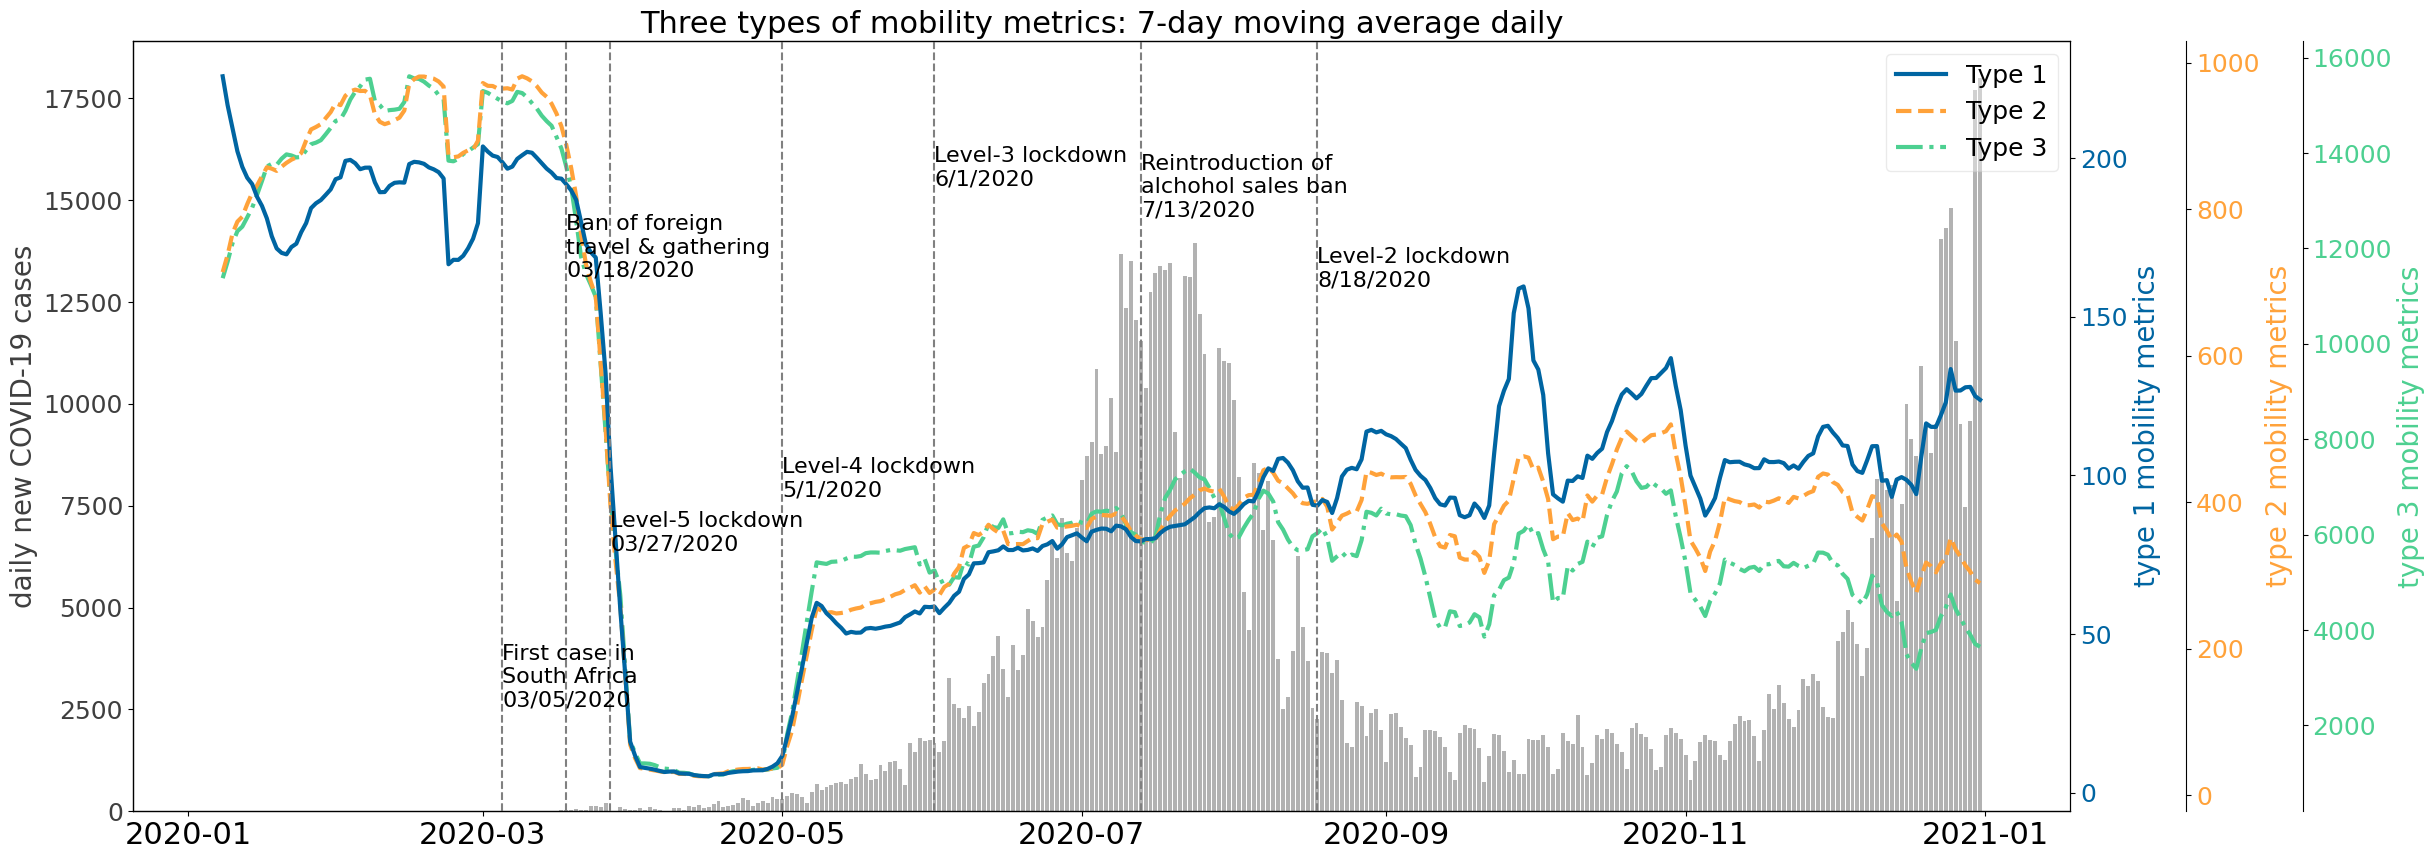

In [15]:
# data['MA7.admin1_inflow_trip_count.per1M'] = data['MA7.admin1_inflow_trip_count'] / data['Population'] * 1000000
# data['MA7.admin1_inbound_admin2_crossbound_trip_count.per1M'] = data['MA7.admin1_inbound_admin2_crossbound_trip_count'] / data['Population'] * 1000000
# data['MA7.admin2_inbound_trip_count.per1M'] = data['MA7.admin2_inbound_trip_count'] / data['Population'] * 1000000

daily_temp = data.groupby('date_2').agg({
    'MA7.admin1_inflow_trip_count': 'sum', 
    'bl.admin1_inflow_trip_count': 'sum', 
    'MA7.admin1_inbound_admin2_crossbound_trip_count': 'sum', 
    'bl.admin1_inbound_admin2_crossbound_trip_count': 'sum', 
    'MA7.admin2_inbound_trip_count': 'sum', 
    'bl.admin2_inbound_trip_count': 'sum', 
    'new_cases': 'sum', 
    'Population': 'sum', 
    }).reset_index()

daily_temp['MA7.admin1_inflow_trip_count.per1M'] = daily_temp['MA7.admin1_inflow_trip_count'] / daily_temp['Population'] * 1000000
daily_temp['MA7.admin1_inbound_admin2_crossbound_trip_count.per1M'] = daily_temp['MA7.admin1_inbound_admin2_crossbound_trip_count'] / daily_temp['Population'] * 1000000
daily_temp['MA7.admin2_inbound_trip_count.per1M'] = daily_temp['MA7.admin2_inbound_trip_count'] / daily_temp['Population'] * 1000000

daily_temp = daily_temp.loc[daily_temp['date_2'] >= datetime.datetime(2020,1,8)]
# daily_temp = daily_temp.loc[daily_temp['date_2'] >= datetime.datetime(2020,3,5)]

label1 = 'Type 1'
label2 = 'Type 2'
label3 = 'Type 3'
# label1 = 'province inflow trips per 1 million people'
# label2 = 'cross-district trips per 1 million people'
# label3 = 'within-district trips per 1 million people'
color1 = '#0065A2'
color2 = '#FFA23A'
color3 = '#4DD091'
color4 = '#3f3f3f'
linestyle1 = '-'
linestyle2 = '--'
linestyle3 = '-.'
line_w = 3.0
val1_alia = 'type 1 mobility metrics'
val2_alia = 'type 2 mobility metrics'
val3_alia = 'type 3 mobility metrics'
val4_alia = 'daily new COVID-19 cases'

fig, ax = plt.subplots(figsize=(25, 10))
line4 = ax.bar(daily_temp['date_2'], daily_temp['new_cases'], color = color4, alpha=0.4)
# line1, = ax.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inflow_trip_count'], linewidth=line_w, linestyle=linestyle1, color=color1)
# line2, = ax.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inbound_admin2_crossbound_trip_count'], linewidth=line_w, linestyle=linestyle2, color=color2)
# line3, = ax.plot(daily_temp['date_2'], daily_temp['MA7.admin2_inbound_trip_count'], linewidth=line_w, linestyle=linestyle3, color=color3)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis ='y', labelsize=18, labelcolor = color4)
ax.set_ylabel('%s' % val4_alia, fontsize=20, color=color4)

ax1 = ax.twinx()
line1, = ax1.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inflow_trip_count.per1M'], linewidth=line_w, linestyle=linestyle1, color=color1)
ax1.tick_params(axis ='y', labelcolor = color1, labelsize=18)
ax1.spines['right'].set_position(("axes", 1.0))
ax1.set_ylabel('%s' % val1_alia, fontsize=20, color=color1)

ax2 = ax.twinx()
line2, = ax2.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inbound_admin2_crossbound_trip_count.per1M'], linewidth=line_w, linestyle=linestyle2, color=color2)
ax2.tick_params(axis ='y', labelcolor = color2, labelsize=18)
ax2.spines['right'].set_position(("axes", 1.06))
ax2.set_ylabel('%s' % val2_alia, fontsize=20, color=color2)

ax3 = ax.twinx()
line3, = ax3.plot(daily_temp['date_2'], daily_temp['MA7.admin2_inbound_trip_count.per1M'], linewidth=line_w, linestyle=linestyle3, color=color3)
ax3.tick_params(axis ='y', labelcolor = color3, labelsize=18)
ax3.spines['right'].set_position(("axes", 1.12))
ax3.set_ylabel('%s' % val3_alia, fontsize=20, color=color3)

max_value = daily_temp['MA7.admin1_inflow_trip_count.per1M'].max()
min_value = daily_temp['MA7.admin1_inflow_trip_count.per1M'].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'

ax1.axvline(datetime.datetime(2020,3,5), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,5), 0.1*min_max_rg+min_value, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,18), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,27), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,27), random.uniform(0.3,0.4)*min_max_rg+min_value, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,5,1), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,5,1), 0.4*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,6,1), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,6,1), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,7,13), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,7,13), 0.8*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,8,18), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,8,18), 0.7*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

ax1.legend([line1, line2, line3], [label1, label2, label3], fontsize=18, loc='best', framealpha=0.4)

ax3.set_zorder(ax.get_zorder()+1)
ax3.patch.set_visible(False)
ax2.set_zorder(ax3.get_zorder()+1)
ax2.patch.set_visible(False)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)

plt.title('Three types of mobility metrics: 7-day moving average daily', fontsize=22)
check_dir('./Figures/%s/3-types-trips-abs-by-pop.png' % (fig_version))
plt.savefig('./Figures/%s/3-types-trips-abs-by-pop.png' % (fig_version), bbox_inches='tight', dpi=300)

##### put 3 types in one figure for 9 provinces (divided by population)

./Figures/v0.11/3-types-trips-abs-by-pop-by-admin1.png


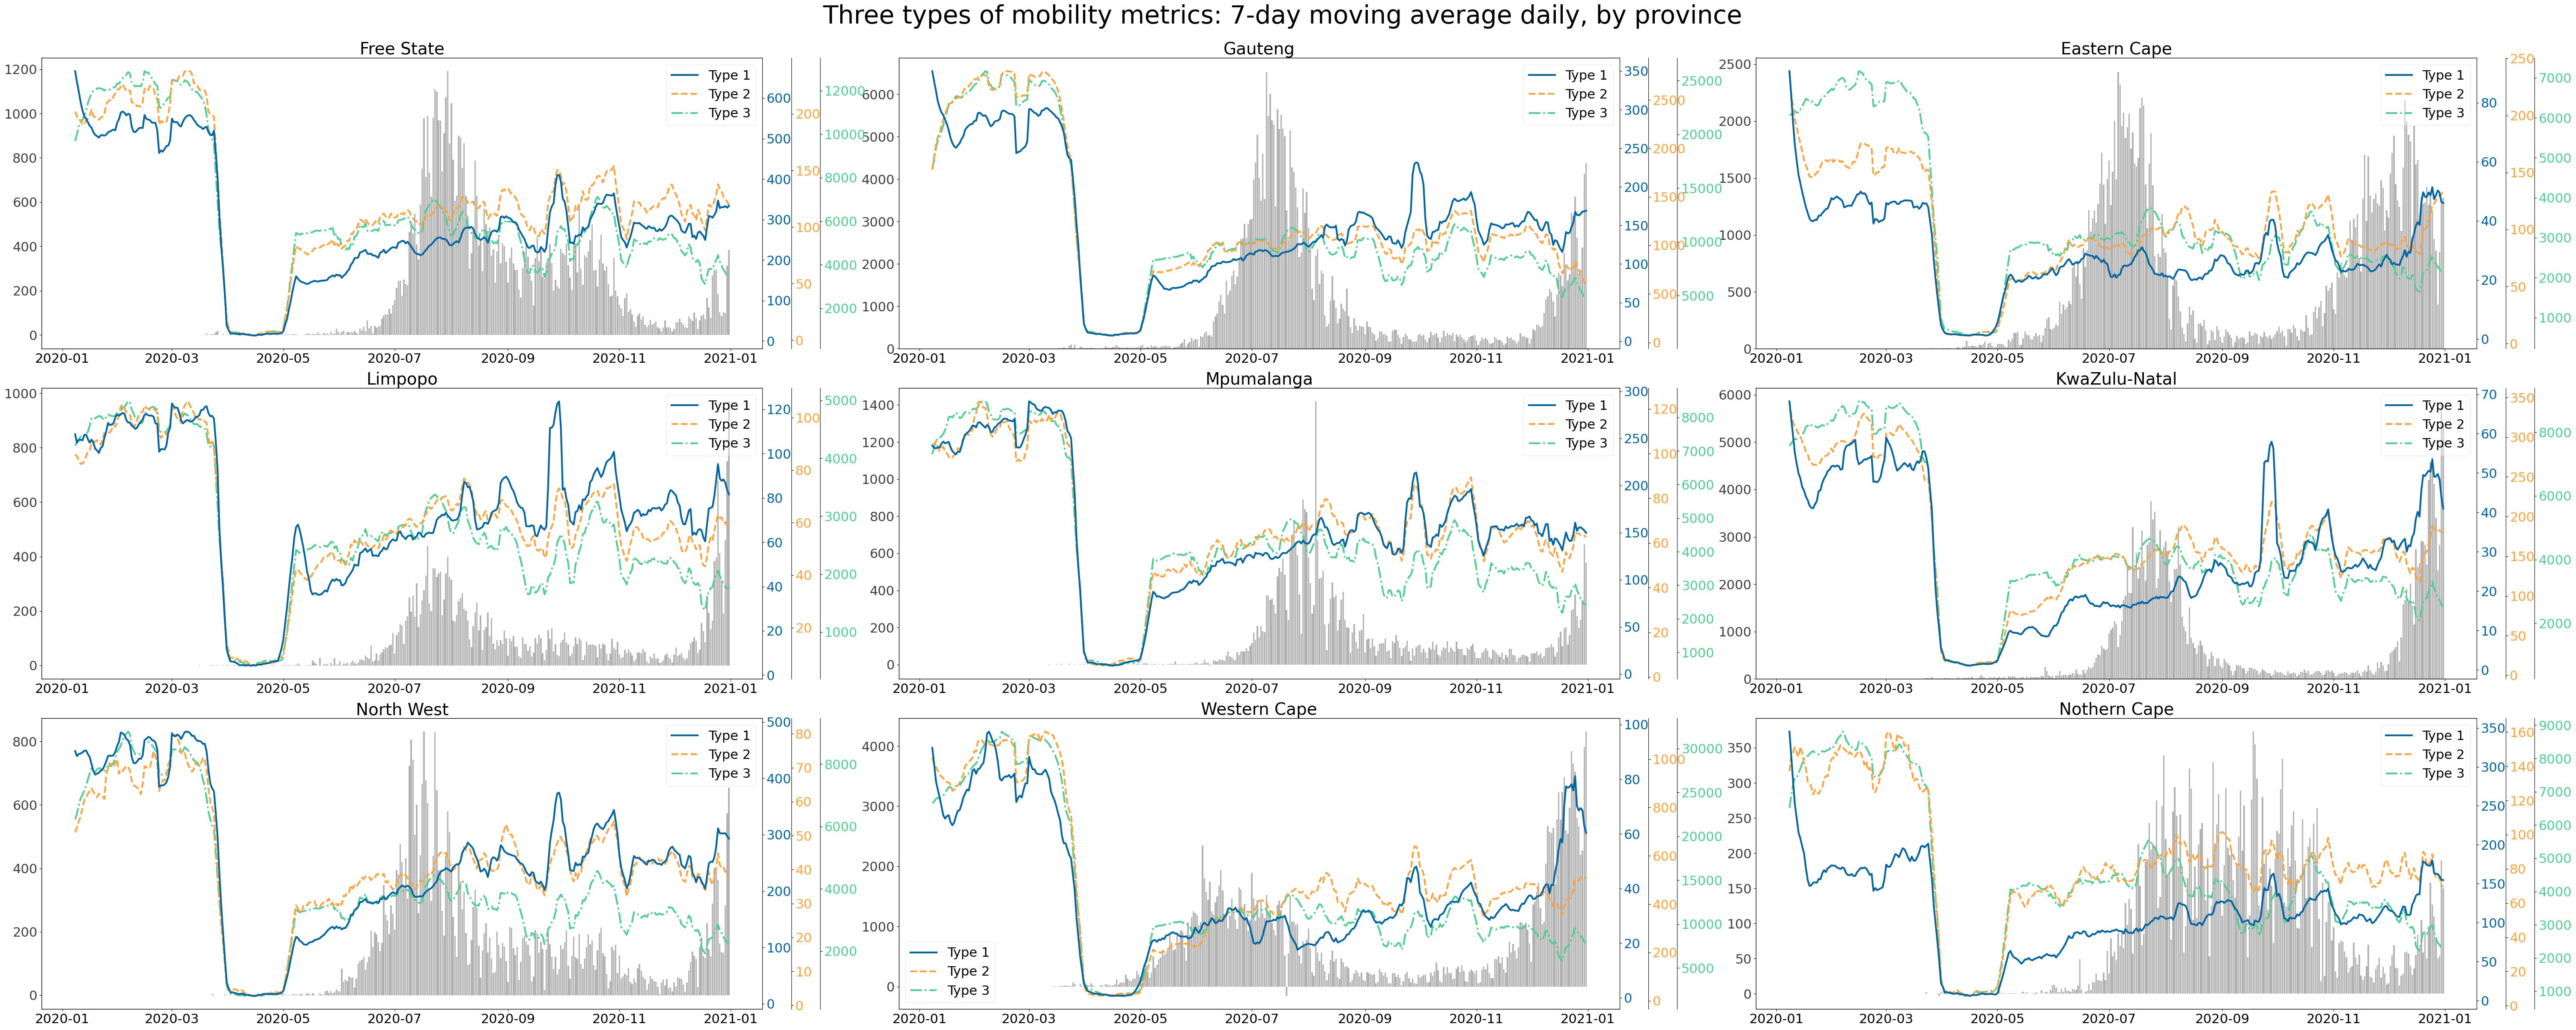

In [16]:
data_temp = data

data_temp['MA7.admin1_inflow_trip_count.per1M'] = data_temp['MA7.admin1_inflow_trip_count'] / data_temp['Population'] * 1000000
data_temp['MA7.admin1_inbound_admin2_crossbound_trip_count.per1M'] = data_temp['MA7.admin1_inbound_admin2_crossbound_trip_count'] / data_temp['Population'] * 1000000
data_temp['MA7.admin2_inbound_trip_count.per1M'] = data_temp['MA7.admin2_inbound_trip_count'] / data_temp['Population'] * 1000000

data_temp = data_temp.loc[data_temp['date_2'] >= datetime.datetime(2020,1,8)]
# data_temp = data_temp.loc[data_temp['date_2'] >= datetime.datetime(2020,3,5)]
admin1Name_2_lst = list(data_temp['admin1Name_2'].drop_duplicates())

i = 0
j = 0
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(60, 24))
for admin1 in admin1Name_2_lst:
    daily_temp = data_temp.loc[data_temp['admin1Name_2'] == admin1]
    label1 = 'Type 1'
    label2 = 'Type 2'
    label3 = 'Type 3'
    # label1 = 'province inflow trips per 1 million people'
    # label2 = 'cross-district trips per 1 million people'
    # label3 = 'within-district trips per 1 million people'
    color1 = '#0065A2'
    color2 = '#FFA23A'
    color3 = '#4DD091'
    color4 = '#3f3f3f'
    linestyle1 = '-'
    linestyle2 = '--'
    linestyle3 = '-.'
    line_w = 3.0
    val1_alia = 'type 1 mobility metrics'
    val2_alia = 'type 2 mobility metrics'
    val3_alia = 'type 3 mobility metrics'
    val4_alia = 'daily new COVID-19 cases'

    axes[i, j].set_title('%s' % admin1, fontsize=28)
    line4 = axes[i, j].bar(daily_temp['date_2'], daily_temp['new_cases'], color = color4, alpha=0.4)
    axes[i, j].tick_params(axis='x', labelsize=22)
    axes[i, j].tick_params(axis ='y', labelsize=22, labelcolor = color4)
    # axes[i, j].set_ylabel('%s' % val4_alia, fontsize=20, color=color4)

    ax1 = axes[i, j].twinx()
    line1, = ax1.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inflow_trip_count.per1M'], linewidth=line_w, linestyle=linestyle1, color=color1)
    ax1.tick_params(axis ='y', labelcolor = color1, labelsize=22)
    ax1.spines['right'].set_position(("axes", 1.0))
    # ax1.set_ylabel('%s' % val1_alia, fontsize=20, color=color1)

    ax2 = axes[i, j].twinx()
    line2, = ax2.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inbound_admin2_crossbound_trip_count.per1M'], linewidth=line_w, linestyle=linestyle2, color=color2)
    ax2.tick_params(axis ='y', labelcolor = color2, labelsize=22)
    ax2.spines['right'].set_position(("axes", 1.04))
    # ax2.set_ylabel('%s' % val2_alia, fontsize=20, color=color2)

    ax3 = axes[i, j].twinx()
    line3, = ax3.plot(daily_temp['date_2'], daily_temp['MA7.admin2_inbound_trip_count.per1M'], linewidth=line_w, linestyle=linestyle3, color=color3)
    ax3.tick_params(axis ='y', labelcolor = color3, labelsize=22)
    ax3.spines['right'].set_position(("axes", 1.08))
    # ax3.set_ylabel('%s' % val3_alia, fontsize=20, color=color3)

    # max_value = daily_temp['MA7.admin1_inflow_trip_count.per1M'].max()
    # min_value = daily_temp['MA7.admin1_inflow_trip_count.per1M'].min()
    # min_max_rg = max_value - min_value

    # vline_tag_size = 16
    # vline_color = 'grey'

    # ax1.axvline(datetime.datetime(2020,3,5), linestyle = 'dashed', color=vline_color)
    # ax1.text(datetime.datetime(2020,3,5), 0.1*min_max_rg+min_value, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
    # ax1.axvline(datetime.datetime(2020,3,18), linestyle = 'dashed', color=vline_color)
    # ax1.text(datetime.datetime(2020,3,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
    # ax1.axvline(datetime.datetime(2020,3,27), linestyle = 'dashed', color=vline_color)
    # ax1.text(datetime.datetime(2020,3,27), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
    # ax1.axvline(datetime.datetime(2020,5,1), linestyle = 'dashed', color=vline_color)
    # ax1.text(datetime.datetime(2020,5,1), 0.4*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
    # ax1.axvline(datetime.datetime(2020,6,1), linestyle = 'dashed', color=vline_color)
    # ax1.text(datetime.datetime(2020,6,1), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
    # ax1.axvline(datetime.datetime(2020,7,13), linestyle = 'dashed', color=vline_color)
    # ax1.text(datetime.datetime(2020,7,13), 0.8*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
    # ax1.axvline(datetime.datetime(2020,8,18), linestyle = 'dashed', color=vline_color)
    # ax1.text(datetime.datetime(2020,8,18), 0.7*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

    ax1.legend([line1, line2, line3], [label1, label2, label3], fontsize=22, loc='best', framealpha=0.4)

    ax3.set_zorder(axes[i, j].get_zorder()+1)
    ax3.patch.set_visible(False)
    ax2.set_zorder(ax3.get_zorder()+1)
    ax2.patch.set_visible(False)
    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False)
    
    i += 1
    if i <= 2:
        pass
    else:
        j += 1
        i = 0
    # break

plt.suptitle('Three types of mobility metrics: 7-day moving average daily, by province', fontsize=42, y=1.0)
plt.tight_layout()
check_dir('./Figures/%s/3-types-trips-abs-by-pop-by-admin1.png' % (fig_version))
plt.savefig('./Figures/%s/3-types-trips-abs-by-pop-by-admin1.png' % (fig_version), bbox_inches='tight', dpi=300)

##### put 3 types in one figure (absolute num)

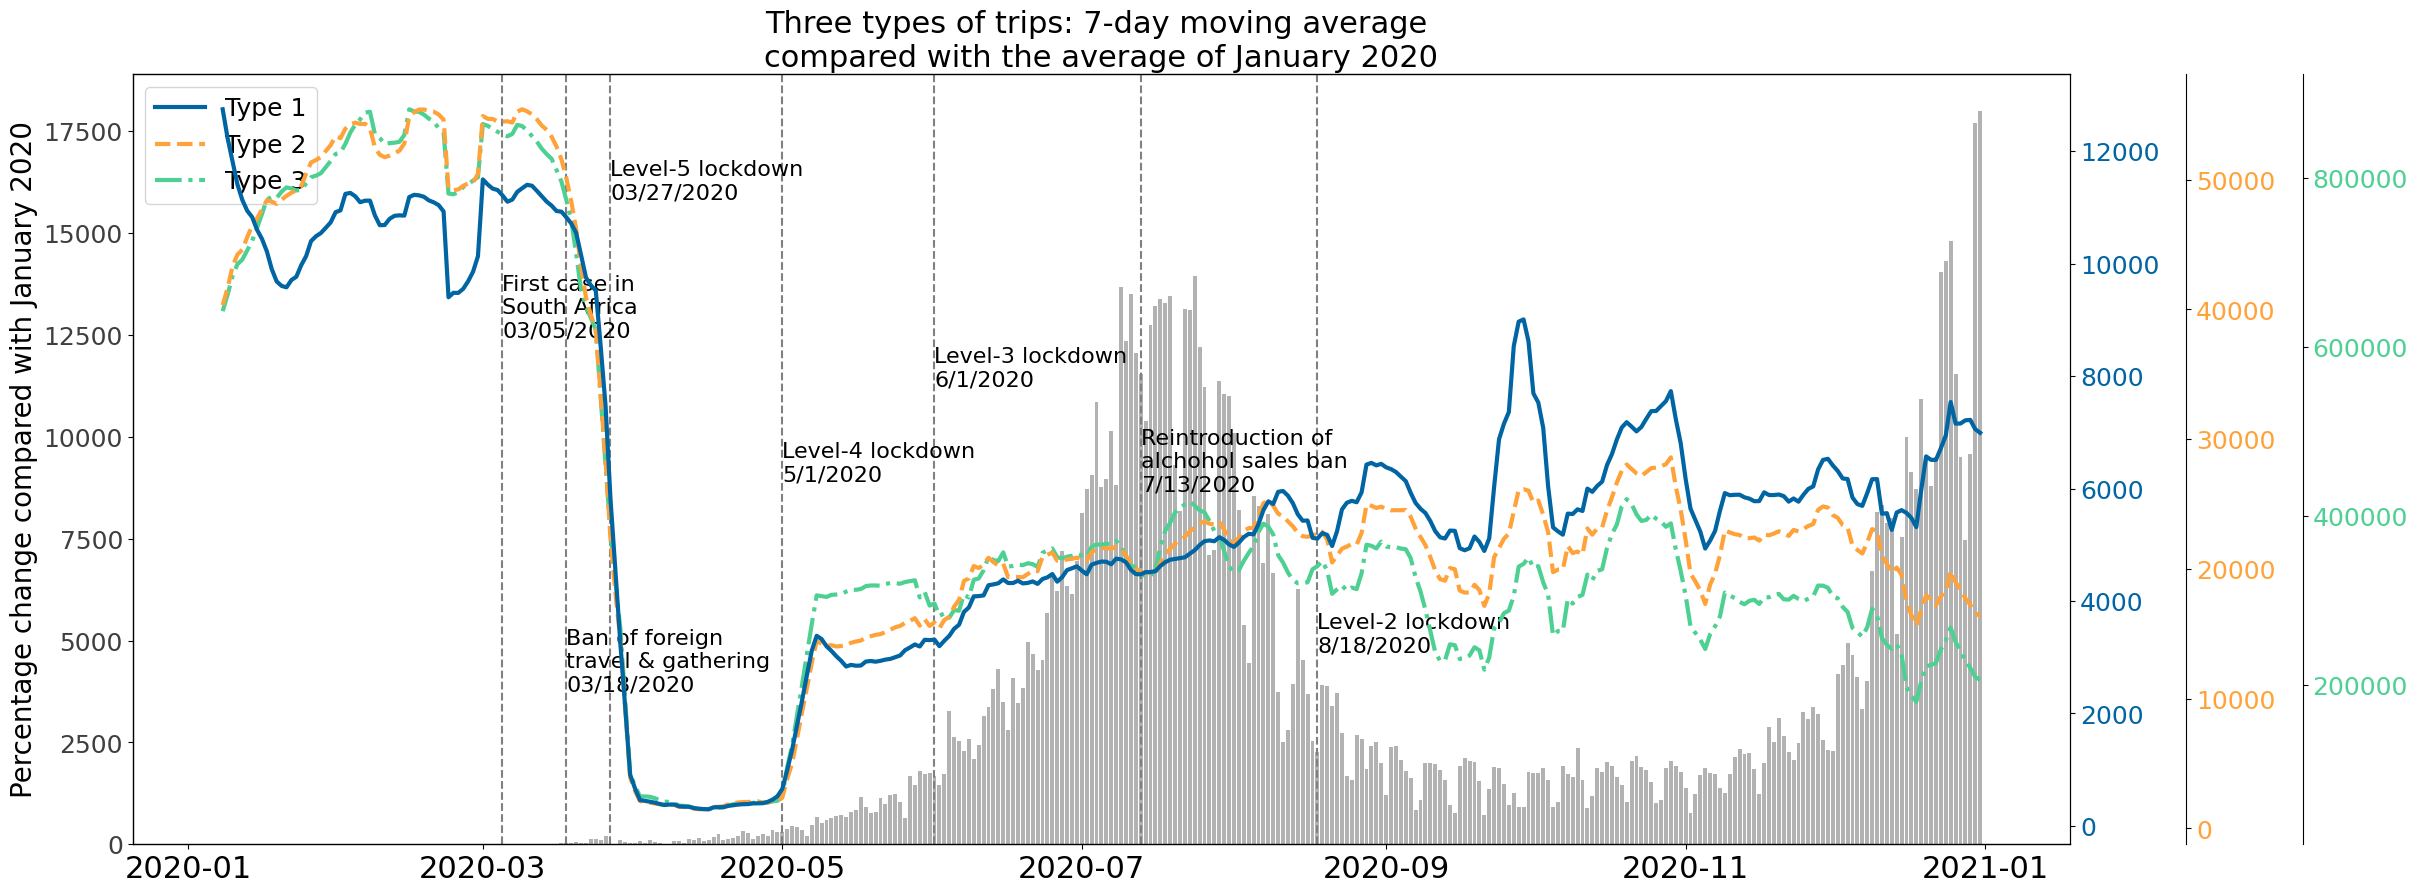

In [17]:
daily_temp = data.groupby('date_2').agg({
    'MA7.admin1_inflow_trip_count': 'sum', 
    'bl.admin1_inflow_trip_count': 'sum', 
    'MA7.admin1_inbound_admin2_crossbound_trip_count': 'sum', 
    'bl.admin1_inbound_admin2_crossbound_trip_count': 'sum', 
    'MA7.admin2_inbound_trip_count': 'sum', 
    'bl.admin2_inbound_trip_count': 'sum', 
    'new_cases': 'sum', 
    }).reset_index()

daily_temp = daily_temp.loc[daily_temp['date_2'] >= datetime.datetime(2020,1,8)]
# daily_temp = daily_temp.loc[daily_temp['date_2'] >= datetime.datetime(2020,3,5)]

label1 = 'Type 1'
label2 = 'Type 2'
label3 = 'Type 3'
# label1 = 'province inflow trips per 1 million people'
# label2 = 'cross-district trips per 1 million people'
# label3 = 'within-district trips per 1 million people'
color1 = '#0065A2'
color2 = '#FFA23A'
color3 = '#4DD091'
color4 = '#3f3f3f'
linestyle1 = '-'
linestyle2 = '--'
linestyle3 = '-.'
line_w = 3.0
val_alia = 'Percentage change compared with January 2020'

fig, ax = plt.subplots(figsize=(25, 10))
line4 = ax.bar(daily_temp['date_2'], daily_temp['new_cases'], color = color4, alpha=0.4)
# line1, = ax.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inflow_trip_count'], linewidth=line_w, linestyle=linestyle1, color=color1)
# line2, = ax.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inbound_admin2_crossbound_trip_count'], linewidth=line_w, linestyle=linestyle2, color=color2)
# line3, = ax.plot(daily_temp['date_2'], daily_temp['MA7.admin2_inbound_trip_count'], linewidth=line_w, linestyle=linestyle3, color=color3)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis ='y', labelsize=18, labelcolor = color4)

ax1 = ax.twinx()
line1, = ax1.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inflow_trip_count'], linewidth=line_w, linestyle=linestyle1, color=color1)
ax1.tick_params(axis ='y', labelcolor = color1, labelsize=18)
ax1.spines['right'].set_position(("axes", 1.0))

ax2 = ax.twinx()
line2, = ax2.plot(daily_temp['date_2'], daily_temp['MA7.admin1_inbound_admin2_crossbound_trip_count'], linewidth=line_w, linestyle=linestyle2, color=color2)
ax2.tick_params(axis ='y', labelcolor = color2, labelsize=18)
ax2.spines['right'].set_position(("axes", 1.06))

ax3 = ax.twinx()
line3, = ax3.plot(daily_temp['date_2'], daily_temp['MA7.admin2_inbound_trip_count'], linewidth=line_w, linestyle=linestyle3, color=color3)
ax3.tick_params(axis ='y', labelcolor = color3, labelsize=18)
ax3.spines['right'].set_position(("axes", 1.12))

max_value = daily_temp['new_cases'].max()
min_value = daily_temp['new_cases'].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'

ax.axvline(datetime.datetime(2020,3,5), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,3,5), max_value-random.uniform(0.1,0.8)*min_max_rg, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,3,18), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,3,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,3,27), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,3,27), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,5,1), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,5,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,6,1), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,6,1), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,7,13), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,7,13), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,8,18), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,8,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

ax.legend([line1, line2, line3], [label1, label2, label3], fontsize=18)

ax.set_ylabel('%s' % val_alia, fontsize=20)

# ax4 = ax.twinx()
# color4 = '#3f3f3f'
# line4 = ax4.bar(daily_temp['date_2'], daily_temp['new_cases'], color = color4, alpha=0.4)
# ax4.tick_params(axis ='y', labelcolor = color4, labelsize=18)
# ax4.spines['right'].set_position(("axes", 1.0))

ax3.set_zorder(ax.get_zorder()+1)
ax3.patch.set_visible(False)
ax2.set_zorder(ax3.get_zorder()+1)
ax2.patch.set_visible(False)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)

plt.title('Three types of trips: 7-day moving average \ncompared with the average of January 2020', fontsize=22)
plt.savefig('./Figures/%s/3-types-trips-abs.png' % (fig_version), bbox_inches='tight', dpi=300)

##### put 3 types in one figure (percentage)

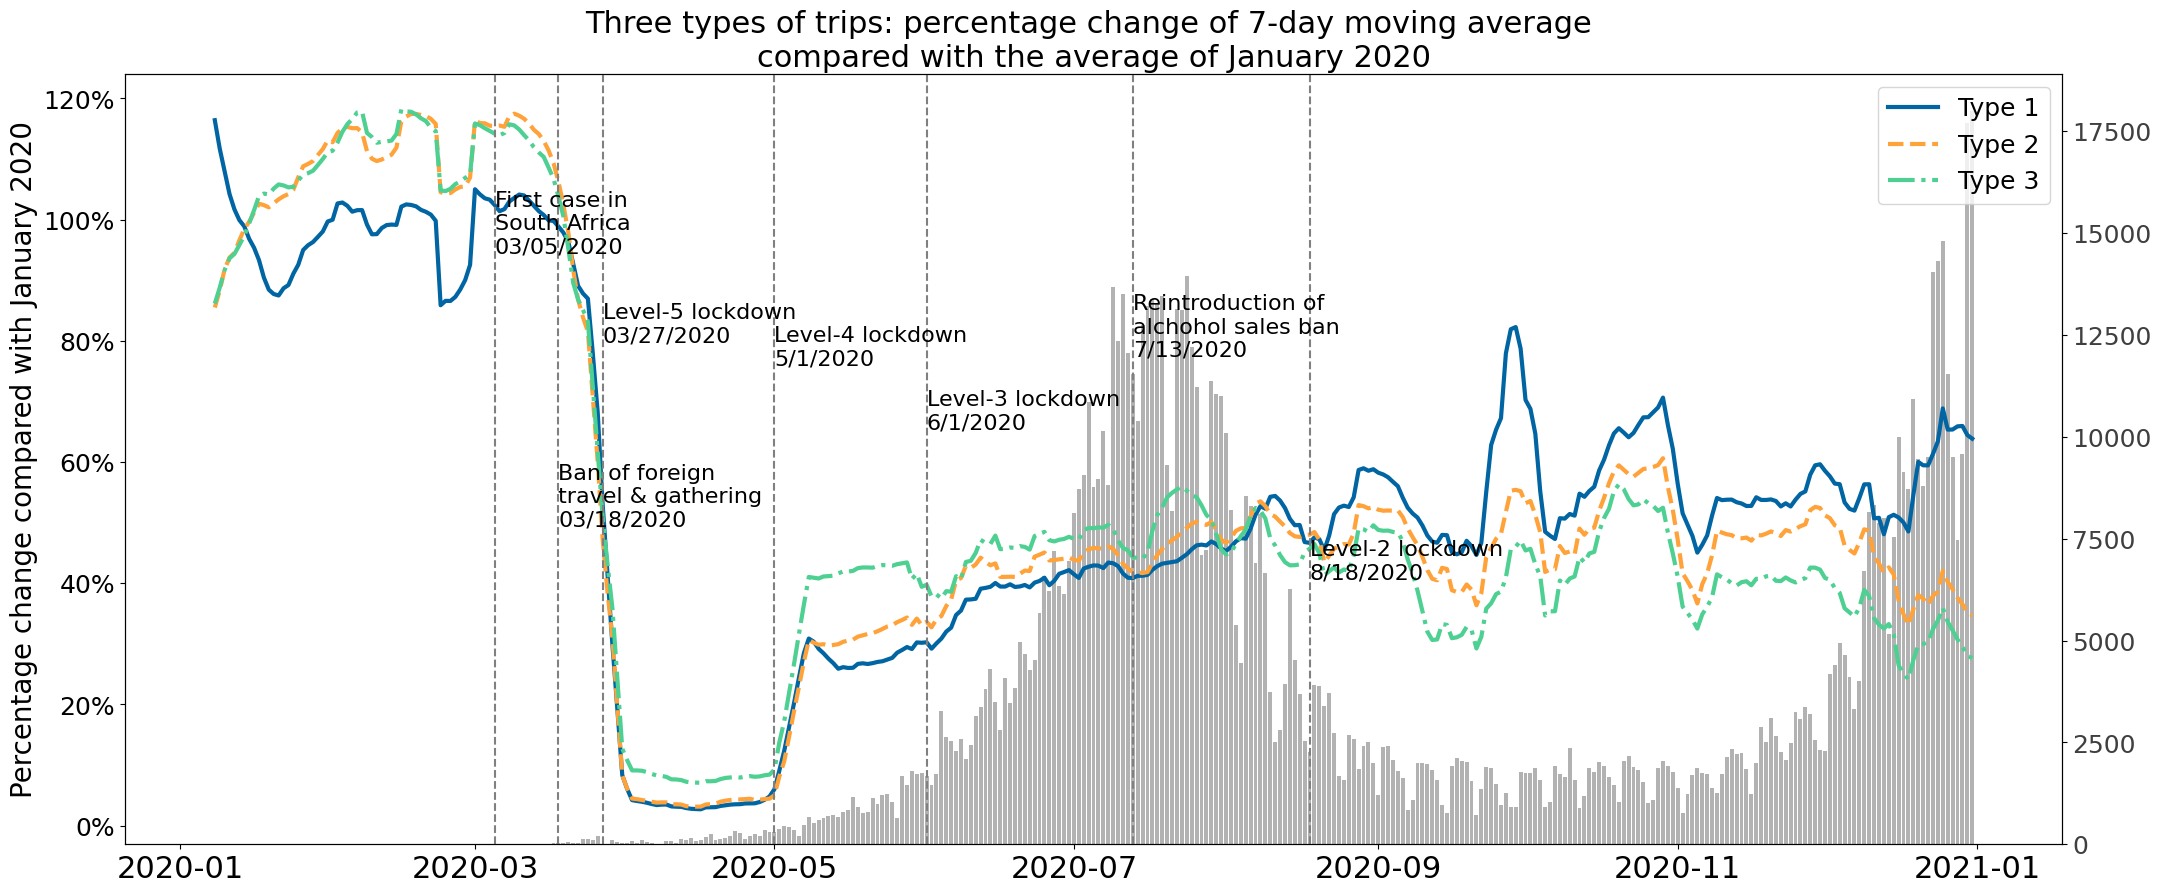

In [18]:
daily_temp = data.groupby('date_2').agg({
    'MA7.admin1_inflow_trip_count': 'sum', 
    'bl.admin1_inflow_trip_count': 'sum', 
    'MA7.admin1_inbound_admin2_crossbound_trip_count': 'sum', 
    'bl.admin1_inbound_admin2_crossbound_trip_count': 'sum', 
    'MA7.admin2_inbound_trip_count': 'sum', 
    'bl.admin2_inbound_trip_count': 'sum', 
    'new_cases': 'sum', 
    }).reset_index()

daily_temp['pct_chg.admin1_inflow_trip_count'] = 100 * daily_temp['MA7.admin1_inflow_trip_count'] / daily_temp['bl.admin1_inflow_trip_count']
daily_temp['pct_chg.admin1_inbound_admin2_crossbound_trip_count'] = 100 * daily_temp['MA7.admin1_inbound_admin2_crossbound_trip_count'] / daily_temp['bl.admin1_inbound_admin2_crossbound_trip_count']
daily_temp['pct_chg.admin2_inbound_trip_count'] = 100 * daily_temp['MA7.admin2_inbound_trip_count'] / daily_temp['bl.admin2_inbound_trip_count']

daily_temp = daily_temp.loc[daily_temp['date_2'] >= datetime.datetime(2020,1,8)]
# daily_temp = daily_temp.loc[daily_temp['date_2'] >= datetime.datetime(2020,3,5)]

label1 = 'Type 1'
label2 = 'Type 2'
label3 = 'Type 3'
# label1 = 'province inflow trips per 1 million people'
# label2 = 'cross-district trips per 1 million people'
# label3 = 'within-district trips per 1 million people'
color1 = '#0065A2'
color2 = '#FFA23A'
color3 = '#4DD091'
linestyle1 = '-'
linestyle2 = '--'
linestyle3 = '-.'
line_w = 3.0
val_alia = 'Percentage change compared with January 2020'

fig, ax = plt.subplots(figsize=(25, 10))
line1, = ax.plot(daily_temp['date_2'], daily_temp['pct_chg.admin1_inflow_trip_count'], linewidth=line_w, linestyle=linestyle1, color=color1)
line2, = ax.plot(daily_temp['date_2'], daily_temp['pct_chg.admin1_inbound_admin2_crossbound_trip_count'], linewidth=line_w, linestyle=linestyle2, color=color2)
line3, = ax.plot(daily_temp['date_2'], daily_temp['pct_chg.admin2_inbound_trip_count'], linewidth=line_w, linestyle=linestyle3, color=color3)

ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis ='y', labelsize=18)

max_value = daily_temp['pct_chg.admin1_inflow_trip_count'].max()
min_value = daily_temp['pct_chg.admin1_inflow_trip_count'].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'

ax.axvline(datetime.datetime(2020,3,5), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,3,5), max_value-random.uniform(0.1,0.8)*min_max_rg, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,3,18), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,3,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,3,27), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,3,27), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,5,1), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,5,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,6,1), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,6,1), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,7,13), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,7,13), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax.axvline(datetime.datetime(2020,8,18), linestyle = 'dashed', color=vline_color)
ax.text(datetime.datetime(2020,8,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

ax.legend([line1, line2, line3], [label1, label2, label3], fontsize=18)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('%s' % val_alia, fontsize=20)

ax2 = ax.twinx()
color4 = '#3f3f3f'
line4 = ax2.bar(daily_temp['date_2'], daily_temp['new_cases'], color = color4, alpha=0.4)
ax2.tick_params(axis ='y', labelcolor = color4, labelsize=18)
ax2.spines['right'].set_position(("axes", 1.0))

ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

plt.title('Three types of trips: percentage change of 7-day moving average \ncompared with the average of January 2020', fontsize=22)
plt.savefig('./Figures/%s/3-types-trips-pct.png' % (fig_version), bbox_inches='tight', dpi=300)

### Read coefs data

In [19]:
coefs = pd.read_csv(proj_path + '/Results/SEM_coefs_%s_%s.csv' % (time_window, version), index_col=0)
coefs['date_2'] = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in coefs['date_2']]
coefs

Response  \
1                         log.new_cases.per1M   
2                         log.new_cases.per1M   
3                         log.new_cases.per1M   
4                         log.new_cases.per1M   
5                         log.new_cases.per1M   
...                                       ...   
5426  l22.log.admin2_inbound_trip_count.per1M   
5427  l22.log.admin2_inbound_trip_count.per1M   
5428  l22.log.admin2_inbound_trip_count.per1M   
5429  l22.log.admin2_inbound_trip_count.per1M   
5430  l22.log.admin2_inbound_trip_count.per1M   

                                              Predictor  Estimate  Std.Error  \
1                                           (Intercept)   -0.3043     0.7234   
2                 l3.log.admin1_inflow_trip_count.per1M    0.0033     0.0120   
3     l16.log.admin1_inbound_admin2_crossbound_trip_...    0.0222     0.0200   
4               l22.log.admin2_inbound_trip_count.per1M   -0.0276     0.0236   
5                                l1.log.new_cases.per1M    0.9497     0.0109   
...                                                 ...       ...        ...   
5426            l23.log.admin2_inbound_trip_count.per1M    0.4897     0.0227   
5427                                                rwi    0.9131     0.0873   
5428                                           X65p_pct    3.4507     2.4269   
5429                                              M_pct    3.0949     1.2613   
5430                                        l22.weekend   -0.3441     0.0180   

        DF  Crit.Value  P.Value  Std.Estimate Unnamed: 9     date_2  
1     1066     -0.4207   0.6741        0.0000        NaN 2020-03-05  
2     1066      0.2750   0.7834        0.0032        NaN 2020-03-05  
3     1066      1.1085   0.2679        0.0220        NaN 2020-03-05  
4     1066     -1.1668   0.2435       -0.0194        NaN 2020-03-05  
5     1066     87.2287   0.0000        0.9372        *** 2020-03-05  
...    ...         ...      ...           ...        ...        ...  
5426  1050     21.5683   0.0000        0.4896        *** 2020-09-01  
5427    21     10.4575   0.0000        0.3773        *** 2020-09-01  
5428    21      1.4219   0.1698        0.0464        NaN 2020-09-01  
5429    21      2.4538   0.0230        0.0804          * 2020-09-01  
5430  1050    -19.1161   0.0000       -0.2691        *** 2020-09-01  

[5430 rows x 10 columns]

In [20]:
coefs['Predictor'].drop_duplicates()

1                                           (Intercept)
2                 l3.log.admin1_inflow_trip_count.per1M
3     l16.log.admin1_inbound_admin2_crossbound_trip_...
4               l22.log.admin2_inbound_trip_count.per1M
5                                l1.log.new_cases.per1M
6                                               weekend
7                                                   rwi
8                                              X65p_pct
9                                                 M_pct
11                           l4.MA7.log.new_cases.per1M
12                l4.log.admin1_inflow_trip_count.per1M
16                                           l3.weekend
18                          l17.MA7.log.new_cases.per1M
19    l17.log.admin1_inbound_admin2_crossbound_trip_...
23                                          l16.weekend
25                          l23.MA7.log.new_cases.per1M
26              l23.log.admin2_inbound_trip_count.per1M
30                                          l22.

### Plot performance of model (R squared)

In [21]:
perf = pd.read_csv(proj_path + '/Results/SEM_perf_%s_%s.csv' % (time_window, version), index_col=0)
perf['date_2'] = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in perf['date_2']]
perf

Response    family      link  \
1                                  log.new_cases.per1M  gaussian  identity   
2                l3.log.admin1_inflow_trip_count.per1M  gaussian  identity   
3    l16.log.admin1_inbound_admin2_crossbound_trip_...  gaussian  identity   
4              l22.log.admin2_inbound_trip_count.per1M  gaussian  identity   
5                                  log.new_cases.per1M  gaussian  identity   
..                                                 ...       ...       ...   
720            l22.log.admin2_inbound_trip_count.per1M  gaussian  identity   
721                                log.new_cases.per1M  gaussian  identity   
722              l3.log.admin1_inflow_trip_count.per1M  gaussian  identity   
723  l16.log.admin1_inbound_admin2_crossbound_trip_...  gaussian  identity   
724            l22.log.admin2_inbound_trip_count.per1M  gaussian  identity   

    method  Marginal  Conditional     date_2  
1     none      0.90         0.90 2020-03-05  
2     none      0.70         0.93 2020-03-05  
3     none      0.62         0.94 2020-03-05  
4     none      0.33         0.92 2020-03-05  
5     none      0.90         0.90 2020-03-06  
..     ...       ...          ...        ...  
720   none      0.79         0.81 2020-08-31  
721   none      0.81         0.82 2020-09-01  
722   none      0.54         0.88 2020-09-01  
723   none      0.92         0.94 2020-09-01  
724   none      0.79         0.81 2020-09-01  

[724 rows x 7 columns]

In [22]:
for response in perf['Response'].drop_duplicates():
    temp_perf_1 = perf.loc[(perf['Response'] == response)]
    temp_perf_1 = temp_perf_1[['date_2', 'Response', 'Marginal', 'Conditional']].set_index('date_2')
    print(temp_perf_1.describe())
    # break

         Marginal  Conditional
count  181.000000   181.000000
mean     0.834972     0.849779
std      0.074174     0.060018
min      0.720000     0.770000
25%      0.760000     0.790000
50%      0.830000     0.840000
75%      0.910000     0.910000
max      0.930000     0.930000
         Marginal  Conditional
count  181.000000   181.000000
mean     0.653149     0.929282
std      0.044591     0.017160
min      0.470000     0.880000
25%      0.640000     0.920000
50%      0.670000     0.930000
75%      0.680000     0.950000
max      0.710000     0.950000
         Marginal  Conditional
count  181.000000   181.000000
mean     0.797514     0.957901
std      0.153811     0.012824
min      0.500000     0.940000
25%      0.640000     0.950000
50%      0.920000     0.950000
75%      0.920000     0.970000
max      0.930000     0.980000
         Marginal  Conditional
count  181.000000   181.000000
mean     0.588453     0.885856
std      0.244103     0.059731
min      0.240000     0.810000
25%     

Avg Marginal R-squared of log.new_cases.per1M is 0.83
Avg Conditional R-squared of log.new_cases.per1M is 0.85
Avg Marginal R-squared of l3.log.admin1_inflow_trip_count.per1M is 0.65
Avg Conditional R-squared of l3.log.admin1_inflow_trip_count.per1M is 0.93
Avg Marginal R-squared of l16.log.admin1_inbound_admin2_crossbound_trip_count.per1M is 0.80
Avg Conditional R-squared of l16.log.admin1_inbound_admin2_crossbound_trip_count.per1M is 0.96
Avg Marginal R-squared of l22.log.admin2_inbound_trip_count.per1M is 0.59
Avg Conditional R-squared of l22.log.admin2_inbound_trip_count.per1M is 0.89


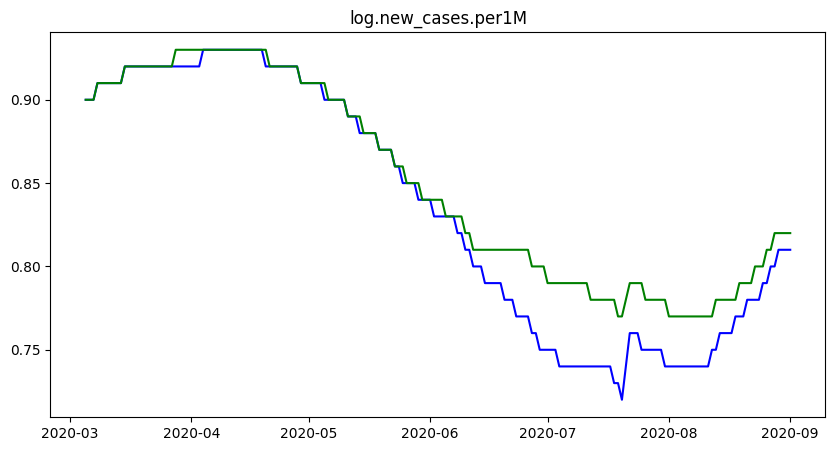

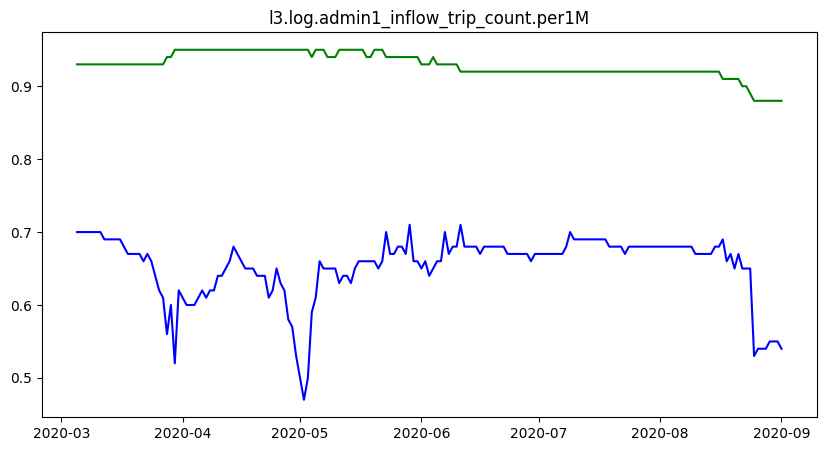

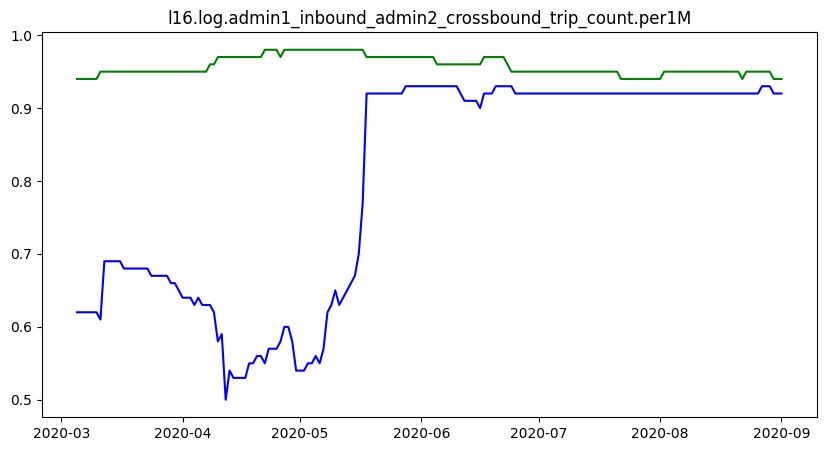

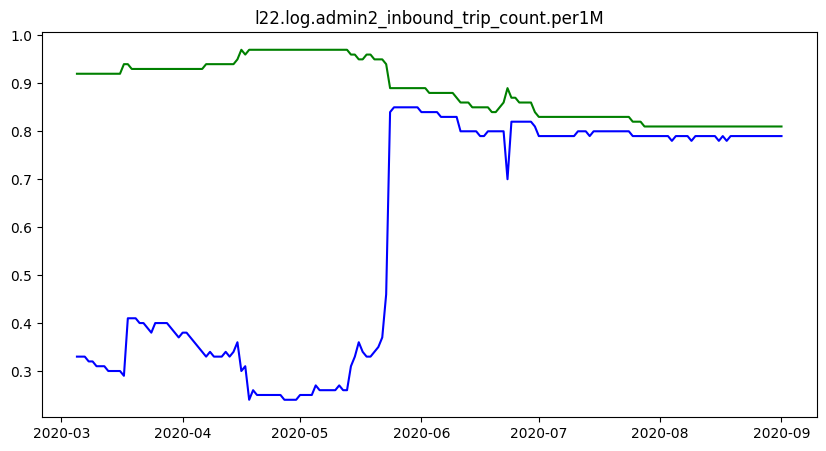

In [23]:
for response in perf['Response'].drop_duplicates():
    temp_perf_1 = perf.loc[(perf['Response'] == response)]
    temp_perf_1 = temp_perf_1[['date_2', 'Response', 'Marginal', 'Conditional']].set_index('date_2')
    print("Avg Marginal R-squared of %s is %.2f" % (response, temp_perf_1['Marginal'].mean()))
    print("Avg Conditional R-squared of %s is %.2f" % (response, temp_perf_1['Conditional'].mean()))

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(temp_perf_1.index, temp_perf_1['Marginal'], color='blue')
    ax.plot(temp_perf_1.index, temp_perf_1['Conditional'], color='green')
    ax.set_title(response)

### Plot random effect of sub-models

#### Sub model 2

In [24]:
lagged_day = 3
response = 'l3.log.admin1_inflow_trip_count.per1M'
predictor = 'l3.lockdown'
response_alias = 'Type 1 mobility metrics'
predictor_alias = 'lockdown level'

rd_model = pd.read_csv(proj_path + '/Results/sub_model2_rd_effc_%s_%s.csv' % (time_window, version), index_col=0)
rd_model['date_2'] = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in rd_model['date_2']]
rd_model

X.Intercept.     date_2 sub_model  lockdown_level        se
0     3.986305e-01 2020-03-05   model_2               0  0.052315
3     2.475431e-01 2020-03-05   model_2               3  0.052315
4     9.649450e-02 2020-03-05   model_2               4  0.052315
5    -7.426681e-01 2020-03-05   model_2               5  0.052315
1     3.935683e-01 2020-03-06   model_2               0  0.052039
...            ...        ...       ...             ...       ...
2127 -3.981584e-08 2020-08-30   model_2               2  0.063171
194   3.765558e-08 2020-08-31   model_2               1  0.063057
2128 -3.765558e-08 2020-08-31   model_2               2  0.063057
195   4.455640e-08 2020-09-01   model_2               1  0.064016
2129 -4.455640e-08 2020-09-01   model_2               2  0.064016

[574 rows x 5 columns]

In [25]:
se_df = rd_model[['date_2', 'se']].drop_duplicates()
se_df

date_2        se
0   2020-03-05  0.052315
1   2020-03-06  0.052039
2   2020-03-07  0.051501
3   2020-03-08  0.051564
4   2020-03-09  0.051988
..         ...       ...
191 2020-08-28  0.063829
192 2020-08-29  0.063126
193 2020-08-30  0.063171
194 2020-08-31  0.063057
195 2020-09-01  0.064016

[181 rows x 2 columns]

In [26]:
rd_model = rd_model.pivot(index='date_2', columns='lockdown_level', values='X.Intercept.').reset_index()
rd_model = rd_model.set_index('date_2').shift(-lagged_day).reset_index().fillna(-99999)
rd_model

lockdown_level     date_2             0             1             2  \
0              2020-03-05      0.383453 -9.999900e+04 -9.999900e+04   
1              2020-03-06      0.391321 -9.999900e+04 -9.999900e+04   
2              2020-03-07      0.388335 -9.999900e+04 -9.999900e+04   
3              2020-03-08      0.396068 -9.999900e+04 -9.999900e+04   
4              2020-03-09      0.395285 -9.999900e+04 -9.999900e+04   
..                    ...           ...           ...           ...   
176            2020-08-28 -99999.000000  3.765558e-08 -3.765558e-08   
177            2020-08-29 -99999.000000  4.455640e-08 -4.455640e-08   
178            2020-08-30 -99999.000000 -9.999900e+04 -9.999900e+04   
179            2020-08-31 -99999.000000 -9.999900e+04 -9.999900e+04   
180            2020-09-01 -99999.000000 -9.999900e+04 -9.999900e+04   

lockdown_level             3             4             5  
0                   0.252945      0.097641     -0.734040  
1                   0.239759      0.096740     -0.727820  
2                   0.236002      0.100015     -0.724352  
3                   0.225291      0.100382     -0.721741  
4                   0.227765      0.105086     -0.728136  
..                       ...           ...           ...  
176            -99999.000000 -99999.000000 -99999.000000  
177            -99999.000000 -99999.000000 -99999.000000  
178            -99999.000000 -99999.000000 -99999.000000  
179            -99999.000000 -99999.000000 -99999.000000  
180            -99999.000000 -99999.000000 -99999.000000  

[181 rows x 7 columns]

In [27]:
rd_model.dtypes

lockdown_level
date_2    datetime64[ns]
0                float64
1                float64
2                float64
3                float64
4                float64
5                float64
dtype: object

In [28]:
temp = []
for idx, row in rd_model.iterrows():
    if row[0] != -99999:
        row['lockdown_effect'] = row[0]
    elif row[5] != -99999:
        row['lockdown_effect'] = row[5]
    elif row[4] != -99999:
        row['lockdown_effect'] = row[4]
    elif row[3] != -99999:
        row['lockdown_effect'] = row[3]
    elif row[2] != -99999:
        row['lockdown_effect'] = row[2]
    elif row[1] != -99999:
        row['lockdown_effect'] = row[1]
    temp.append(row)

rd_model = pd.concat(temp, axis=1).T
rd_model

lockdown_level               date_2         0        1        2         3  \
0               2020-03-05 00:00:00  0.383453 -99999.0 -99999.0  0.252945   
1               2020-03-06 00:00:00  0.391321 -99999.0 -99999.0  0.239759   
2               2020-03-07 00:00:00  0.388335 -99999.0 -99999.0  0.236002   
3               2020-03-08 00:00:00  0.396068 -99999.0 -99999.0  0.225291   
4               2020-03-09 00:00:00  0.395285 -99999.0 -99999.0  0.227765   
..                              ...       ...      ...      ...       ...   
176             2020-08-28 00:00:00  -99999.0      0.0     -0.0  -99999.0   
177             2020-08-29 00:00:00  -99999.0      0.0     -0.0  -99999.0   
178             2020-08-30 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   
179             2020-08-31 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   
180             2020-09-01 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   

lockdown_level         4         5 lockdown_effect  
0               0.097641  -0.73404        0.383453  
1                0.09674  -0.72782        0.391321  
2               0.100015 -0.724352        0.388335  
3               0.100382 -0.721741        0.396068  
4               0.105086 -0.728136        0.395285  
..                   ...       ...             ...  
176             -99999.0  -99999.0            -0.0  
177             -99999.0  -99999.0            -0.0  
178             -99999.0  -99999.0             NaN  
179             -99999.0  -99999.0             NaN  
180             -99999.0  -99999.0             NaN  

[181 rows x 8 columns]

In [29]:
rd_model['date_2'] = pd.to_datetime(rd_model['date_2'])

In [30]:
rd_model = rd_model.merge(se_df, how='left', on='date_2')
rd_model

date_2         0        1        2         3         4         5  \
0   2020-03-05  0.383453 -99999.0 -99999.0  0.252945  0.097641  -0.73404   
1   2020-03-06  0.391321 -99999.0 -99999.0  0.239759   0.09674  -0.72782   
2   2020-03-07  0.388335 -99999.0 -99999.0  0.236002  0.100015 -0.724352   
3   2020-03-08  0.396068 -99999.0 -99999.0  0.225291  0.100382 -0.721741   
4   2020-03-09  0.395285 -99999.0 -99999.0  0.227765  0.105086 -0.728136   
..         ...       ...      ...      ...       ...       ...       ...   
176 2020-08-28  -99999.0      0.0     -0.0  -99999.0  -99999.0  -99999.0   
177 2020-08-29  -99999.0      0.0     -0.0  -99999.0  -99999.0  -99999.0   
178 2020-08-30  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   
179 2020-08-31  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   
180 2020-09-01  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   

    lockdown_effect        se  
0          0.383453  0.052315  
1          0.391321  0.052039  
2          0.388335  0.051501  
3          0.396068  0.051564  
4          0.395285  0.051988  
..              ...       ...  
176            -0.0  0.063829  
177            -0.0  0.063126  
178             NaN  0.063171  
179             NaN  0.063057  
180             NaN  0.064016  

[181 rows x 9 columns]

In [31]:
rd_model = rd_model.dropna(subset=['lockdown_effect'])

##### interpretation results

In [32]:
rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')
date_start = datetime.datetime(2020,3,27)
date_end = datetime.datetime(2020,4,30)
rd_model.loc[(rd_model['date_2'] >= date_start) & (rd_model['date_2'] <= date_end)]['lockdown_effect'] \
    .describe()

C:\Users\k5coo\AppData\Local\Temp\ipykernel_6860\1627330388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')


count    35.000000
mean     -0.571760
std       0.062737
min      -0.730445
25%      -0.623771
50%      -0.567293
75%      -0.530420
max      -0.423614
Name: lockdown_effect, dtype: float64

In [33]:
rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')
date_start = datetime.datetime(2020,5,2)
date_end = datetime.datetime(2020,5,2)
rd_model.loc[(rd_model['date_2'] >= date_start) & (rd_model['date_2'] <= date_end)]['lockdown_effect'] \
    .describe()

C:\Users\k5coo\AppData\Local\Temp\ipykernel_6860\3447061496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')


count    1.000000e+00
mean    -1.120368e-07
std               NaN
min     -1.120368e-07
25%     -1.120368e-07
50%     -1.120368e-07
75%     -1.120368e-07
max     -1.120368e-07
Name: lockdown_effect, dtype: float64

In [34]:
def format_with_latex(text, superscript=None, subscript=None):
    if superscript is not None:
        text = f"{text}^{{{superscript}}}"
    if subscript is not None:
        text = f"{text}_{{{subscript}}}"
    return f"${text}$"

format_with_latex('V', "'", "l, T")

"$V^{'}_{l, T}$"

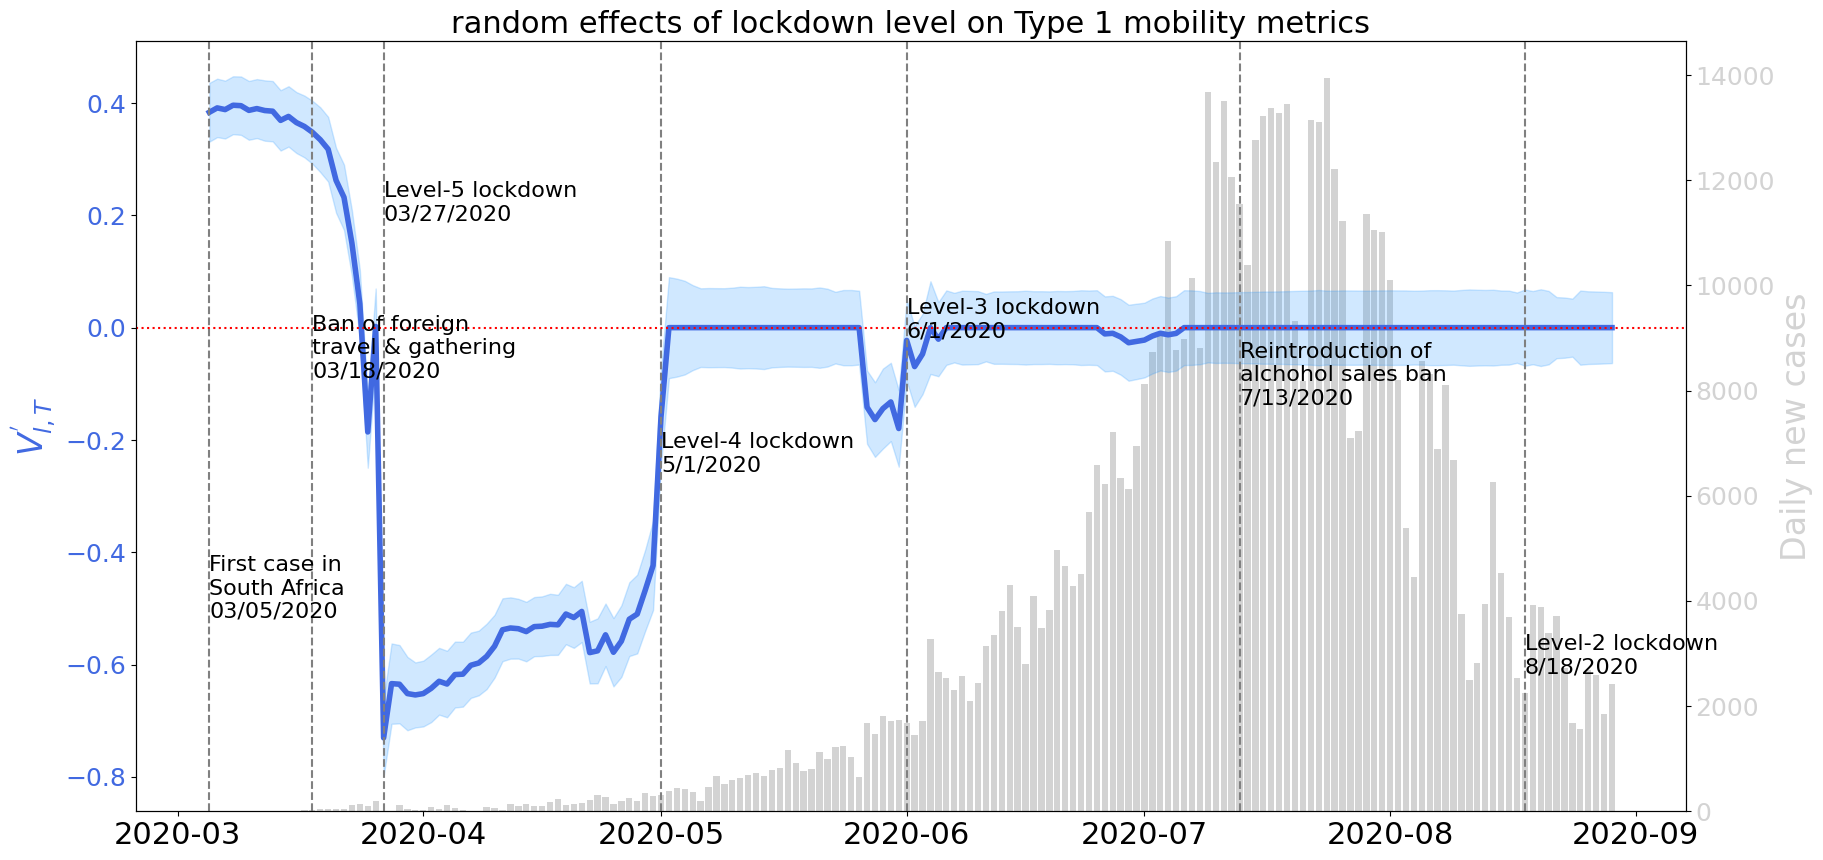

In [35]:
val_c = 'lockdown_effect'
left_y_color = '#1690ff'
# val_c_alia = 'dynamic random effect of lockdown policy'
val_c_alia = format_with_latex('V', "'", "l, T")
err_c = 'se'
fig, ax1 = plt.subplots(figsize=(20, 10))
line_data = rd_model

color = 'royalblue'
# ax1.set_xlabel(idx_c, fontsize=22)
ax1.tick_params(axis='x', labelsize=22)
ax1.set_ylabel('%s' % val_c_alia, fontsize=24, color = color, fontfamily="cursive")
line1 = ax1.plot(line_data['date_2'], line_data[val_c], color=color, linewidth=4)
ax1.tick_params(axis ='y', labelcolor = color, labelsize=18)
ax1.fill_between(line_data['date_2'], line_data[val_c]-line_data[err_c], line_data[val_c]+line_data[err_c], alpha=0.2, color=left_y_color)

max_value = line_data[val_c].max()
min_value = line_data[val_c].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'
ax1.axvline(datetime.datetime(2020,3,5), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,5), random.uniform(0.1,0.2)*min_max_rg+min_value, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,18), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,18), random.uniform(0.3,0.6)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,27), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,27), random.uniform(0.8,0.9)*min_max_rg+min_value, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,5,1), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,5,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,6,1), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,6,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,7,13), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,7,13), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,8,18), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,8,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

ax1.axhline(0, linestyle = ':', color='red')

ax3 = ax1.twinx()
color3 = 'lightgrey'
line_data = line_data.merge(daily_new_cases, how='left', on='date_2')
line3 = ax3.bar(line_data['date_2'], line_data['new_cases'], color = color3)
ax3.tick_params(axis ='y', labelcolor = color3, labelsize=18)
# ax3.spines['right'].set_position(("axes", 1.0))
ax3.set_ylabel('Daily new cases', fontsize=24, color = color3)

ax1.set_zorder(ax3.get_zorder()+1)
ax1.patch.set_visible(False)

plt.title('random effects of %s on %s' % (predictor_alias, response_alias), fontsize=22)
plt.savefig('./Figures/%s/random_effects_%s_%s.png' % (fig_version, response, predictor), bbox_inches='tight', dpi=300)

#### Sub model 3

In [36]:
lagged_day = 16
response = 'l16.log.admin1_inflow_trip_count.per1M'
predictor = 'l16.lockdown'
response_alias = 'Type 2 mobility metrics'
predictor_alias = 'lockdown level'

rd_model = pd.read_csv(proj_path + '/Results/sub_model3_rd_effc_%s_%s.csv' % (time_window, version), index_col=0)
rd_model['date_2'] = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in rd_model['date_2']]
rd_model

X.Intercept.     date_2 sub_model  lockdown_level        se
0     5.434273e-01 2020-03-05   model_3               0  0.036765
3     3.804908e-01 2020-03-05   model_3               3  0.036765
4     1.678369e-01 2020-03-05   model_3               4  0.036765
5    -1.091755e+00 2020-03-05   model_3               5  0.036765
1     5.463447e-01 2020-03-06   model_3               0  0.036787
...            ...        ...       ...             ...       ...
2115 -7.259997e-09 2020-08-31   model_3               2  0.021144
3179  1.866924e-09 2020-08-31   model_3               3  0.021144
182   5.622125e-10 2020-09-01   model_3               1  0.020682
2116 -1.359896e-08 2020-09-01   model_3               2  0.020682
3180  1.303675e-08 2020-09-01   model_3               3  0.020682

[598 rows x 5 columns]

In [37]:
se_df = rd_model[['date_2', 'se']].drop_duplicates()
se_df

date_2        se
0   2020-03-05  0.036765
1   2020-03-06  0.036787
2   2020-03-07  0.036774
3   2020-03-08  0.036544
4   2020-03-09  0.036405
..         ...       ...
178 2020-08-28  0.022447
179 2020-08-29  0.022531
180 2020-08-30  0.021211
181 2020-08-31  0.021144
182 2020-09-01  0.020682

[181 rows x 2 columns]

In [38]:
rd_model = rd_model.pivot(index='date_2', columns='lockdown_level', values='X.Intercept.').reset_index()
rd_model = rd_model.set_index('date_2').shift(-lagged_day).reset_index().fillna(-99999)
rd_model

lockdown_level     date_2             0        1        2             3  \
0              2020-03-05      0.514286 -99999.0 -99999.0      0.298857   
1              2020-03-06      0.517093 -99999.0 -99999.0      0.291604   
2              2020-03-07      0.516894 -99999.0 -99999.0      0.287542   
3              2020-03-08      0.531813 -99999.0 -99999.0      0.275191   
4              2020-03-09      0.527980 -99999.0 -99999.0      0.284362   
..                    ...           ...      ...      ...           ...   
176            2020-08-28 -99999.000000 -99999.0 -99999.0 -99999.000000   
177            2020-08-29 -99999.000000 -99999.0 -99999.0 -99999.000000   
178            2020-08-30 -99999.000000 -99999.0 -99999.0 -99999.000000   
179            2020-08-31 -99999.000000 -99999.0 -99999.0 -99999.000000   
180            2020-09-01 -99999.000000 -99999.0 -99999.0 -99999.000000   

lockdown_level             4             5  
0                   0.142201     -0.955344  
1                   0.142121     -0.950819  
2                   0.144867     -0.949303  
3                   0.149186     -0.956190  
4                   0.155719     -0.968060  
..                       ...           ...  
176            -99999.000000 -99999.000000  
177            -99999.000000 -99999.000000  
178            -99999.000000 -99999.000000  
179            -99999.000000 -99999.000000  
180            -99999.000000 -99999.000000  

[181 rows x 7 columns]

In [39]:
temp = []
for idx, row in rd_model.iterrows():
    if row[0] != -99999:
        row['lockdown_effect'] = row[0]
    elif row[5] != -99999:
        row['lockdown_effect'] = row[5]
    elif row[4] != -99999:
        row['lockdown_effect'] = row[4]
    elif row[3] != -99999:
        row['lockdown_effect'] = row[3]
    elif row[2] != -99999:
        row['lockdown_effect'] = row[2]
    elif row[1] != -99999:
        row['lockdown_effect'] = row[1]
    temp.append(row)

rd_model = pd.concat(temp, axis=1).T
rd_model

lockdown_level               date_2         0        1        2         3  \
0               2020-03-05 00:00:00  0.514286 -99999.0 -99999.0  0.298857   
1               2020-03-06 00:00:00  0.517093 -99999.0 -99999.0  0.291604   
2               2020-03-07 00:00:00  0.516894 -99999.0 -99999.0  0.287542   
3               2020-03-08 00:00:00  0.531813 -99999.0 -99999.0  0.275191   
4               2020-03-09 00:00:00   0.52798 -99999.0 -99999.0  0.284362   
..                              ...       ...      ...      ...       ...   
176             2020-08-28 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   
177             2020-08-29 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   
178             2020-08-30 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   
179             2020-08-31 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   
180             2020-09-01 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   

lockdown_level         4         5 lockdown_effect  
0               0.142201 -0.955344        0.514286  
1               0.142121 -0.950819        0.517093  
2               0.144867 -0.949303        0.516894  
3               0.149186  -0.95619        0.531813  
4               0.155719  -0.96806         0.52798  
..                   ...       ...             ...  
176             -99999.0  -99999.0             NaN  
177             -99999.0  -99999.0             NaN  
178             -99999.0  -99999.0             NaN  
179             -99999.0  -99999.0             NaN  
180             -99999.0  -99999.0             NaN  

[181 rows x 8 columns]

In [40]:
rd_model['date_2'] = pd.to_datetime(rd_model['date_2'])

In [41]:
rd_model = rd_model.merge(se_df, how='left', on='date_2')
rd_model

date_2         0        1        2         3         4         5  \
0   2020-03-05  0.514286 -99999.0 -99999.0  0.298857  0.142201 -0.955344   
1   2020-03-06  0.517093 -99999.0 -99999.0  0.291604  0.142121 -0.950819   
2   2020-03-07  0.516894 -99999.0 -99999.0  0.287542  0.144867 -0.949303   
3   2020-03-08  0.531813 -99999.0 -99999.0  0.275191  0.149186  -0.95619   
4   2020-03-09   0.52798 -99999.0 -99999.0  0.284362  0.155719  -0.96806   
..         ...       ...      ...      ...       ...       ...       ...   
176 2020-08-28  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   
177 2020-08-29  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   
178 2020-08-30  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   
179 2020-08-31  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   
180 2020-09-01  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   

    lockdown_effect        se  
0          0.514286  0.036765  
1          0.517093  0.036787  
2          0.516894  0.036774  
3          0.531813  0.036544  
4           0.52798  0.036405  
..              ...       ...  
176             NaN  0.022447  
177             NaN  0.022531  
178             NaN  0.021211  
179             NaN  0.021144  
180             NaN  0.020682  

[181 rows x 9 columns]

In [42]:
rd_model = rd_model.dropna(subset=['lockdown_effect'])

##### interpretation results

In [43]:
rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')
date_start = datetime.datetime(2020,3,27)
date_end = datetime.datetime(2020,4,30)
rd_model.loc[(rd_model['date_2'] >= date_start) & (rd_model['date_2'] <= date_end)]['lockdown_effect'] \
    .describe()

C:\Users\k5coo\AppData\Local\Temp\ipykernel_6860\1627330388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')


count    35.000000
mean     -0.929549
std       0.042710
min      -1.021844
25%      -0.956094
50%      -0.926986
75%      -0.904789
max      -0.812372
Name: lockdown_effect, dtype: float64

In [44]:
rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')
date_start = datetime.datetime(2020,5,2)
date_end = datetime.datetime(2020,5,2)
rd_model.loc[(rd_model['date_2'] >= date_start) & (rd_model['date_2'] <= date_end)]['lockdown_effect'] \
    .describe()

C:\Users\k5coo\AppData\Local\Temp\ipykernel_6860\3447061496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')


count    1.000000
mean    -0.069108
std           NaN
min     -0.069108
25%     -0.069108
50%     -0.069108
75%     -0.069108
max     -0.069108
Name: lockdown_effect, dtype: float64

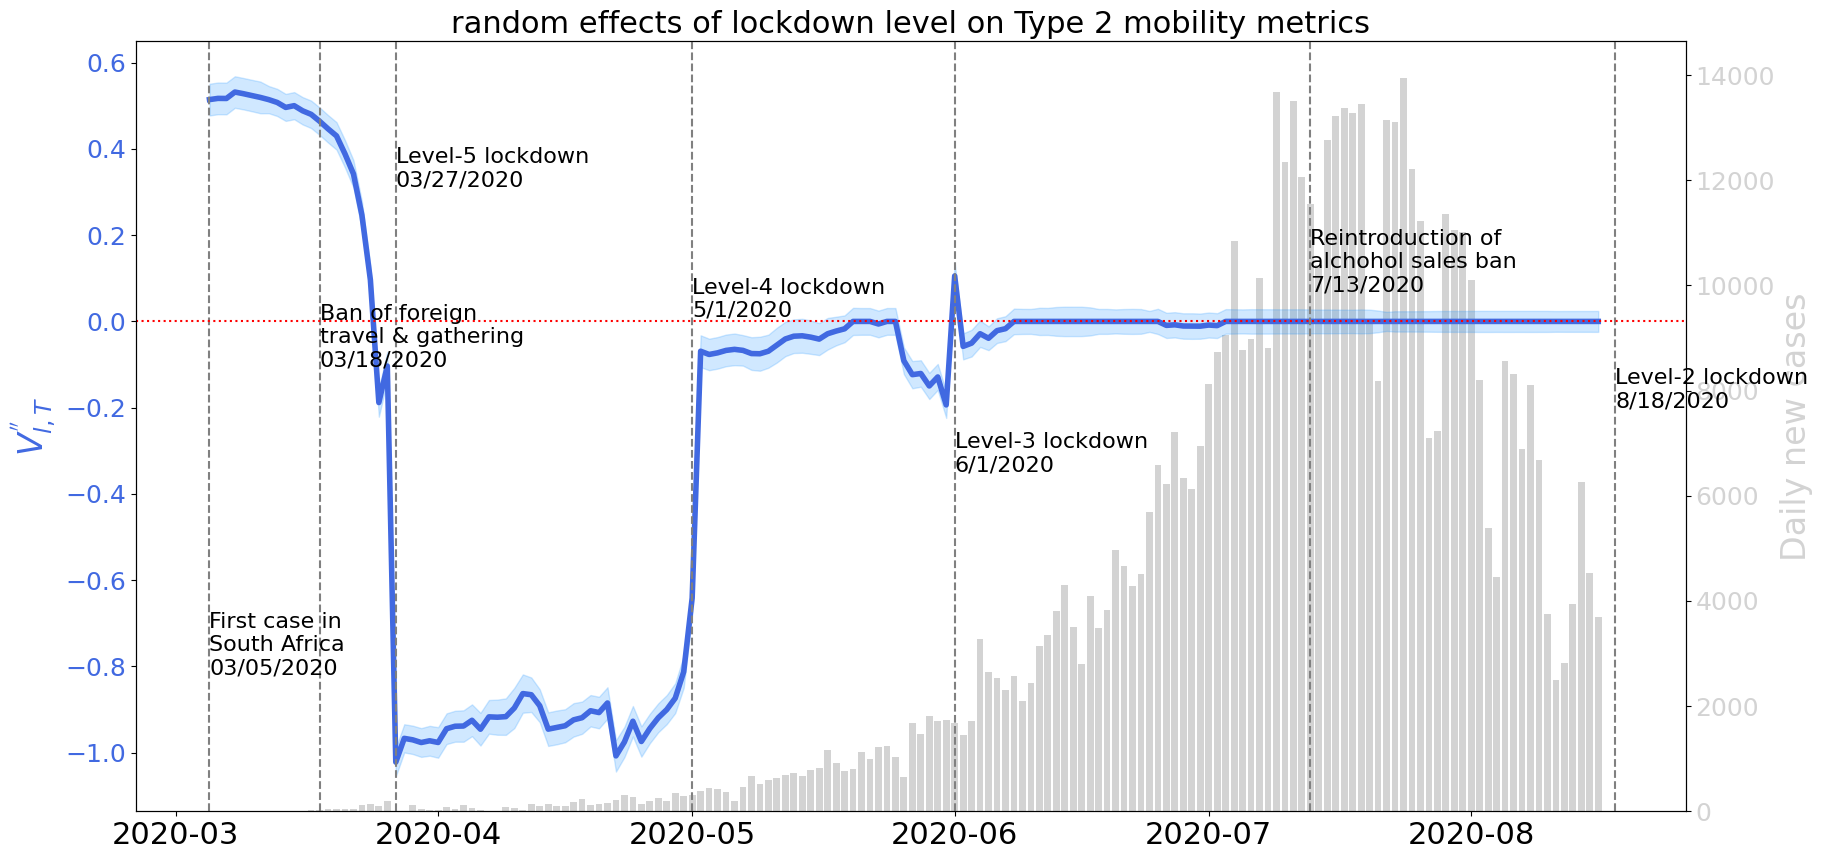

In [45]:
val_c = 'lockdown_effect'
left_y_color = '#1690ff'
# val_c_alia = 'dynamic random effect of lockdown policy'
val_c_alia = format_with_latex('V', "''", "l, T")
val_c2_alia = 'P.Value'
err_c = 'se'

fig, ax1 = plt.subplots(figsize=(20, 10))
line_data = rd_model

color = 'royalblue'
# ax1.set_xlabel(idx_c, fontsize=22)
ax1.tick_params(axis='x', labelsize=22)
ax1.set_ylabel('%s' % val_c_alia, fontsize=24, color = color)
line1 = ax1.plot(line_data['date_2'], line_data[val_c], color=color, linewidth=4)
ax1.tick_params(axis ='y', labelcolor = color, labelsize=18)
ax1.fill_between(line_data['date_2'], line_data[val_c]-line_data[err_c], line_data[val_c]+line_data[err_c], alpha=0.2, color=left_y_color)

max_value = line_data[val_c].max()
min_value = line_data[val_c].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'
ax1.axvline(datetime.datetime(2020,3,5), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,5), random.uniform(0.1,0.2)*min_max_rg+min_value, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,18), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,18), random.uniform(0.3,0.6)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,27), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,27), random.uniform(0.8,0.9)*min_max_rg+min_value, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,5,1), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,5,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,6,1), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,6,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,7,13), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,7,13), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,8,18), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,8,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

ax1.axhline(0, linestyle = ':', color='red')

ax3 = ax1.twinx()
color3 = 'lightgrey'
line_data = line_data.merge(daily_new_cases, how='left', on='date_2')
line3 = ax3.bar(line_data['date_2'], line_data['new_cases'], color = color3)
ax3.tick_params(axis ='y', labelcolor = color3, labelsize=18)
# ax3.spines['right'].set_position(("axes", 1.0))
ax3.set_ylabel('Daily new cases', fontsize=24, color = color3)

ax1.set_zorder(ax3.get_zorder()+1)
ax1.patch.set_visible(False)

plt.title('random effects of %s on %s' % (predictor_alias, response_alias), fontsize=22)
plt.savefig('./Figures/%s/random_effects_%s_%s.png' % (fig_version, response, predictor), bbox_inches='tight', dpi=300)

#### Sub model 4

In [46]:
lagged_day = 22
response = 'l22.log.admin1_inflow_trip_count.per1M'
predictor = 'l22.lockdown'
response_alias = 'Type 3 mobility metrics'
predictor_alias = 'lockdown level'

rd_model = pd.read_csv(proj_path + '/Results/sub_model4_rd_effc_%s_%s.csv' % (time_window, version), index_col=0)
rd_model['date_2'] = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in rd_model['date_2']]
rd_model

X.Intercept.     date_2 sub_model  lockdown_level        se
0         0.458530 2020-03-05   model_4               0  0.023793
3         0.441560 2020-03-05   model_4               3  0.023793
4         0.250411 2020-03-05   model_4               4  0.023793
5        -1.150502 2020-03-05   model_4               5  0.023793
1         0.457005 2020-03-06   model_4               0  0.023688
...            ...        ...       ...             ...       ...
2109     -0.033213 2020-08-31   model_4               2  0.010063
3179      0.032508 2020-08-31   model_4               3  0.010063
176       0.001145 2020-09-01   model_4               1  0.010274
2110     -0.035557 2020-09-01   model_4               2  0.010274
3180      0.034412 2020-09-01   model_4               3  0.010274

[604 rows x 5 columns]

In [47]:
se_df = rd_model[['date_2', 'se']].drop_duplicates()
se_df

date_2        se
0   2020-03-05  0.023793
1   2020-03-06  0.023688
2   2020-03-07  0.023518
3   2020-03-08  0.023326
4   2020-03-09  0.023444
..         ...       ...
172 2020-08-28  0.010247
173 2020-08-29  0.010253
174 2020-08-30  0.010260
175 2020-08-31  0.010063
176 2020-09-01  0.010274

[181 rows x 2 columns]

In [48]:
rd_model = rd_model.pivot(index='date_2', columns='lockdown_level', values='X.Intercept.').reset_index()
rd_model = rd_model.set_index('date_2').shift(-lagged_day).reset_index().fillna(-99999)
rd_model

lockdown_level     date_2             0        1        2             3  \
0              2020-03-05      0.471791 -99999.0 -99999.0      0.290987   
1              2020-03-06      0.477188 -99999.0 -99999.0      0.280735   
2              2020-03-07      0.481582 -99999.0 -99999.0      0.273649   
3              2020-03-08      0.481001 -99999.0 -99999.0      0.282805   
4              2020-03-09      0.502043 -99999.0 -99999.0      0.269927   
..                    ...           ...      ...      ...           ...   
176            2020-08-28 -99999.000000 -99999.0 -99999.0 -99999.000000   
177            2020-08-29 -99999.000000 -99999.0 -99999.0 -99999.000000   
178            2020-08-30 -99999.000000 -99999.0 -99999.0 -99999.000000   
179            2020-08-31 -99999.000000 -99999.0 -99999.0 -99999.000000   
180            2020-09-01 -99999.000000 -99999.0 -99999.0 -99999.000000   

lockdown_level             4             5  
0                   0.167048     -0.929825  
1                   0.167268     -0.925191  
2                   0.169303     -0.924534  
3                   0.176135     -0.939941  
4                   0.176676     -0.948645  
..                       ...           ...  
176            -99999.000000 -99999.000000  
177            -99999.000000 -99999.000000  
178            -99999.000000 -99999.000000  
179            -99999.000000 -99999.000000  
180            -99999.000000 -99999.000000  

[181 rows x 7 columns]

In [49]:
temp = []
for idx, row in rd_model.iterrows():
    if row[0] != -99999:
        row['lockdown_effect'] = row[0]
    elif row[5] != -99999:
        row['lockdown_effect'] = row[5]
    elif row[4] != -99999:
        row['lockdown_effect'] = row[4]
    elif row[3] != -99999:
        row['lockdown_effect'] = row[3]
    elif row[2] != -99999:
        row['lockdown_effect'] = row[2]
    elif row[1] != -99999:
        row['lockdown_effect'] = row[1]
    temp.append(row)

rd_model = pd.concat(temp, axis=1).T
rd_model

lockdown_level               date_2         0        1        2         3  \
0               2020-03-05 00:00:00  0.471791 -99999.0 -99999.0  0.290987   
1               2020-03-06 00:00:00  0.477188 -99999.0 -99999.0  0.280735   
2               2020-03-07 00:00:00  0.481582 -99999.0 -99999.0  0.273649   
3               2020-03-08 00:00:00  0.481001 -99999.0 -99999.0  0.282805   
4               2020-03-09 00:00:00  0.502043 -99999.0 -99999.0  0.269927   
..                              ...       ...      ...      ...       ...   
176             2020-08-28 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   
177             2020-08-29 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   
178             2020-08-30 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   
179             2020-08-31 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   
180             2020-09-01 00:00:00  -99999.0 -99999.0 -99999.0  -99999.0   

lockdown_level         4         5 lockdown_effect  
0               0.167048 -0.929825        0.471791  
1               0.167268 -0.925191        0.477188  
2               0.169303 -0.924534        0.481582  
3               0.176135 -0.939941        0.481001  
4               0.176676 -0.948645        0.502043  
..                   ...       ...             ...  
176             -99999.0  -99999.0             NaN  
177             -99999.0  -99999.0             NaN  
178             -99999.0  -99999.0             NaN  
179             -99999.0  -99999.0             NaN  
180             -99999.0  -99999.0             NaN  

[181 rows x 8 columns]

In [50]:
rd_model['date_2'] = pd.to_datetime(rd_model['date_2'])

In [51]:
rd_model = rd_model.merge(se_df, how='left', on='date_2')
rd_model

date_2         0        1        2         3         4         5  \
0   2020-03-05  0.471791 -99999.0 -99999.0  0.290987  0.167048 -0.929825   
1   2020-03-06  0.477188 -99999.0 -99999.0  0.280735  0.167268 -0.925191   
2   2020-03-07  0.481582 -99999.0 -99999.0  0.273649  0.169303 -0.924534   
3   2020-03-08  0.481001 -99999.0 -99999.0  0.282805  0.176135 -0.939941   
4   2020-03-09  0.502043 -99999.0 -99999.0  0.269927  0.176676 -0.948645   
..         ...       ...      ...      ...       ...       ...       ...   
176 2020-08-28  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   
177 2020-08-29  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   
178 2020-08-30  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   
179 2020-08-31  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   
180 2020-09-01  -99999.0 -99999.0 -99999.0  -99999.0  -99999.0  -99999.0   

    lockdown_effect        se  
0          0.471791  0.023793  
1          0.477188  0.023688  
2          0.481582  0.023518  
3          0.481001  0.023326  
4          0.502043  0.023444  
..              ...       ...  
176             NaN  0.010247  
177             NaN  0.010253  
178             NaN  0.010260  
179             NaN  0.010063  
180             NaN  0.010274  

[181 rows x 9 columns]

In [52]:
rd_model = rd_model.dropna(subset=['lockdown_effect'])

##### interpretation results

In [53]:
rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')
date_start = datetime.datetime(2020,3,27)
date_end = datetime.datetime(2020,4,30)
rd_model.loc[(rd_model['date_2'] >= date_start) & (rd_model['date_2'] <= date_end)]['lockdown_effect'] \
    .describe()

C:\Users\k5coo\AppData\Local\Temp\ipykernel_6860\1627330388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')


count    35.000000
mean     -0.900900
std       0.028327
min      -0.982821
25%      -0.919598
50%      -0.905167
75%      -0.875691
max      -0.851625
Name: lockdown_effect, dtype: float64

In [54]:
rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')
date_start = datetime.datetime(2020,5,2)
date_end = datetime.datetime(2020,5,2)
rd_model.loc[(rd_model['date_2'] >= date_start) & (rd_model['date_2'] <= date_end)]['lockdown_effect'] \
    .describe()

C:\Users\k5coo\AppData\Local\Temp\ipykernel_6860\3447061496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd_model['lockdown_effect'] = rd_model['lockdown_effect'].astype('float')


count    1.000000e+00
mean     3.106513e-10
std               NaN
min      3.106513e-10
25%      3.106513e-10
50%      3.106513e-10
75%      3.106513e-10
max      3.106513e-10
Name: lockdown_effect, dtype: float64

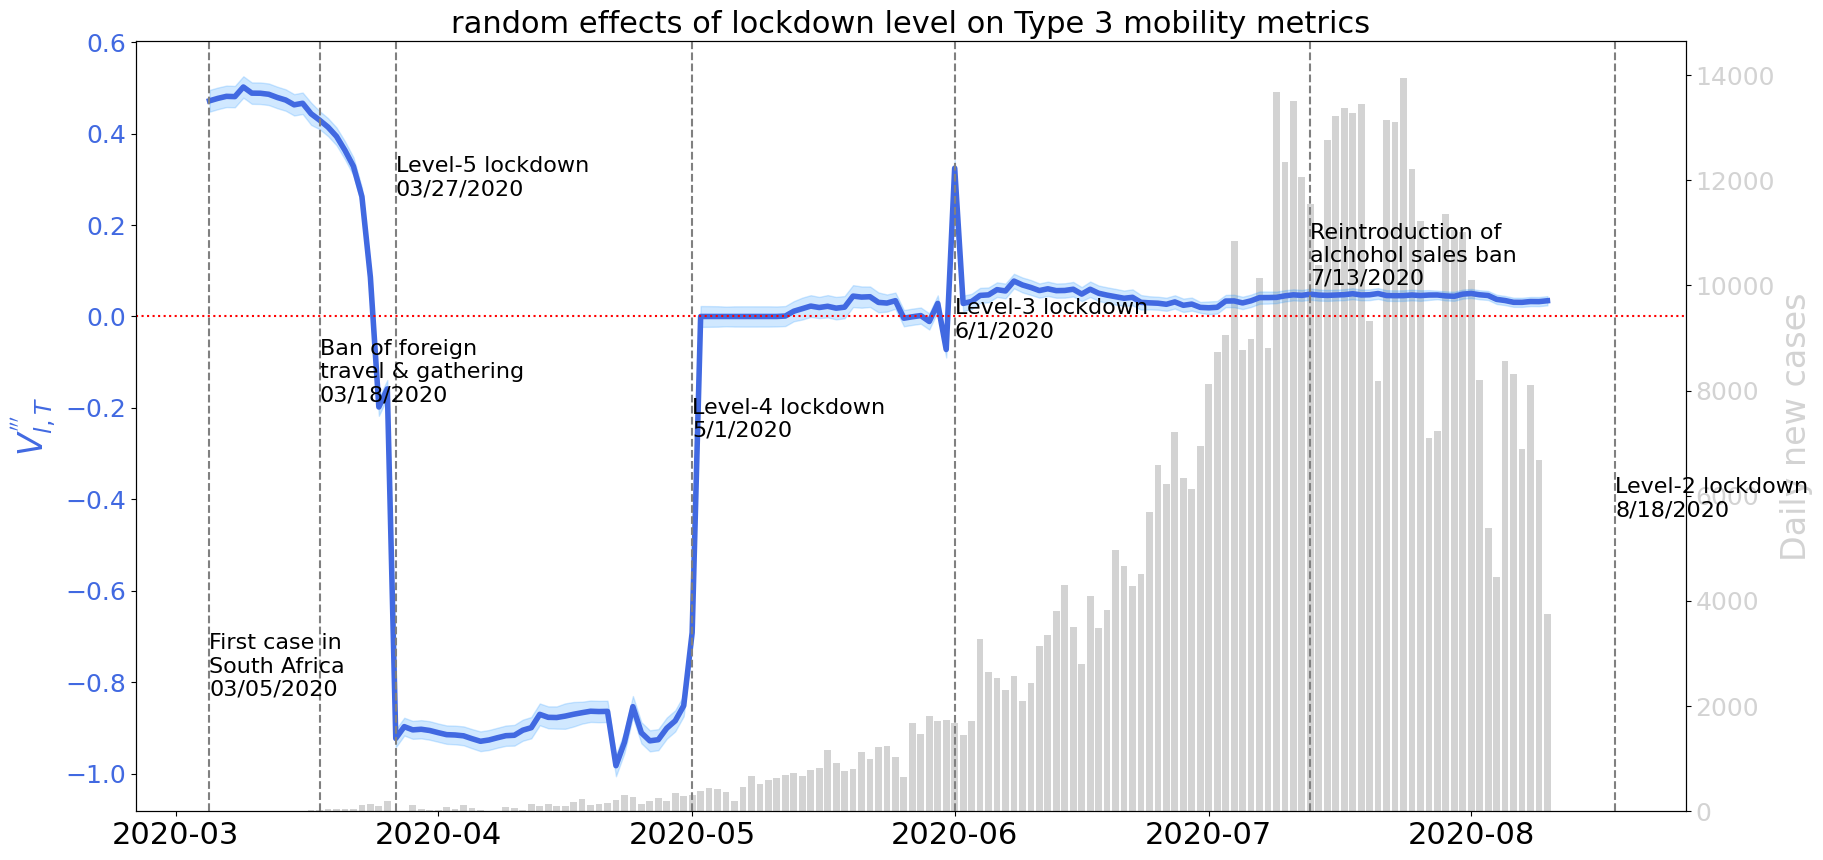

In [55]:
val_c = 'lockdown_effect'
left_y_color = '#1690ff'
# val_c_alia = 'dynamic random effect of lockdown policy'
val_c_alia = format_with_latex('V', "'''", "l, T")
val_c2_alia = 'P.Value'
err_c = 'se'
fig, ax1 = plt.subplots(figsize=(20, 10))
line_data = rd_model

color = 'royalblue'
# ax1.set_xlabel(idx_c, fontsize=22)
ax1.tick_params(axis='x', labelsize=22)
ax1.set_ylabel('%s' % val_c_alia, fontsize=24, color = color)
line1 = ax1.plot(line_data['date_2'], line_data[val_c], color=color, linewidth=4)
ax1.tick_params(axis ='y', labelcolor = color, labelsize=18)
ax1.fill_between(line_data['date_2'], line_data[val_c]-line_data[err_c], line_data[val_c]+line_data[err_c], alpha=0.2, color=left_y_color)

max_value = line_data[val_c].max()
min_value = line_data[val_c].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'
ax1.axvline(datetime.datetime(2020,3,5), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,5), random.uniform(0.1,0.2)*min_max_rg+min_value, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,18), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,18), random.uniform(0.3,0.6)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,27), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,27), random.uniform(0.8,0.9)*min_max_rg+min_value, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,5,1), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,5,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,6,1), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,6,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,7,13), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,7,13), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,8,18), linestyle = 'dashed', color=vline_color)
ax1.text(datetime.datetime(2020,8,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

ax1.axhline(0, linestyle = ':', color='red')

ax3 = ax1.twinx()
color3 = 'lightgrey'
line_data = line_data.merge(daily_new_cases, how='left', on='date_2')
line3 = ax3.bar(line_data['date_2'], line_data['new_cases'], color = color3)
ax3.tick_params(axis ='y', labelcolor = color3, labelsize=18)
# ax3.spines['right'].set_position(("axes", 1.0))
ax3.set_ylabel('Daily new cases', fontsize=24, color = color3)

ax1.set_zorder(ax3.get_zorder()+1)
ax1.patch.set_visible(False)

plt.title('random effects of %s on %s' % (predictor_alias, response_alias), fontsize=22)
plt.savefig('./Figures/%s/random_effects_%s_%s.png' % (fig_version, response, predictor), bbox_inches='tight', dpi=300)

### Plot case v.s. inflow coefs

In [75]:
response = 'log.new_cases.per1M'
predictor = 'l3.log.admin1_inflow_trip_count.per1M'
response_alias = 'daily new cases per 1M population'
predictor_alias = 'type 1 metrics'

In [76]:
case_inflow_coefs = coefs.loc[(coefs['Response'] == response) & (coefs['Predictor'] == predictor)]
# case_inflow_coefs = coefs.loc[(coefs['Response'] == 'log.new_cases.per1M') & (coefs['Predictor'] == 'l7_admin1_inflow_trip_count')]
case_inflow_coefs = case_inflow_coefs[['date_2', 'Estimate', 'Std.Error', 'P.Value']].set_index('date_2')
case_inflow_coefs

Estimate  Std.Error  P.Value
date_2                                  
2020-03-05    0.0033     0.0120   0.7834
2020-03-06    0.0041     0.0120   0.7348
2020-03-07    0.0045     0.0120   0.7065
2020-03-08    0.0050     0.0121   0.6798
2020-03-09    0.0062     0.0121   0.6068
...              ...        ...      ...
2020-08-28    0.0172     0.0372   0.6430
2020-08-29    0.0145     0.0370   0.6959
2020-08-30    0.0144     0.0368   0.6949
2020-08-31    0.0124     0.0368   0.7364
2020-09-01    0.0222     0.0374   0.5527

[181 rows x 3 columns]

#### Interpretation results

In [77]:
case_inflow_coefs.loc[(case_inflow_coefs.index >= datetime.datetime(2020,3,22)) & (case_inflow_coefs.index <= datetime.datetime(2020,4,8))].mean()

Estimate     0.086411
Std.Error    0.020306
P.Value      0.003161
dtype: float64

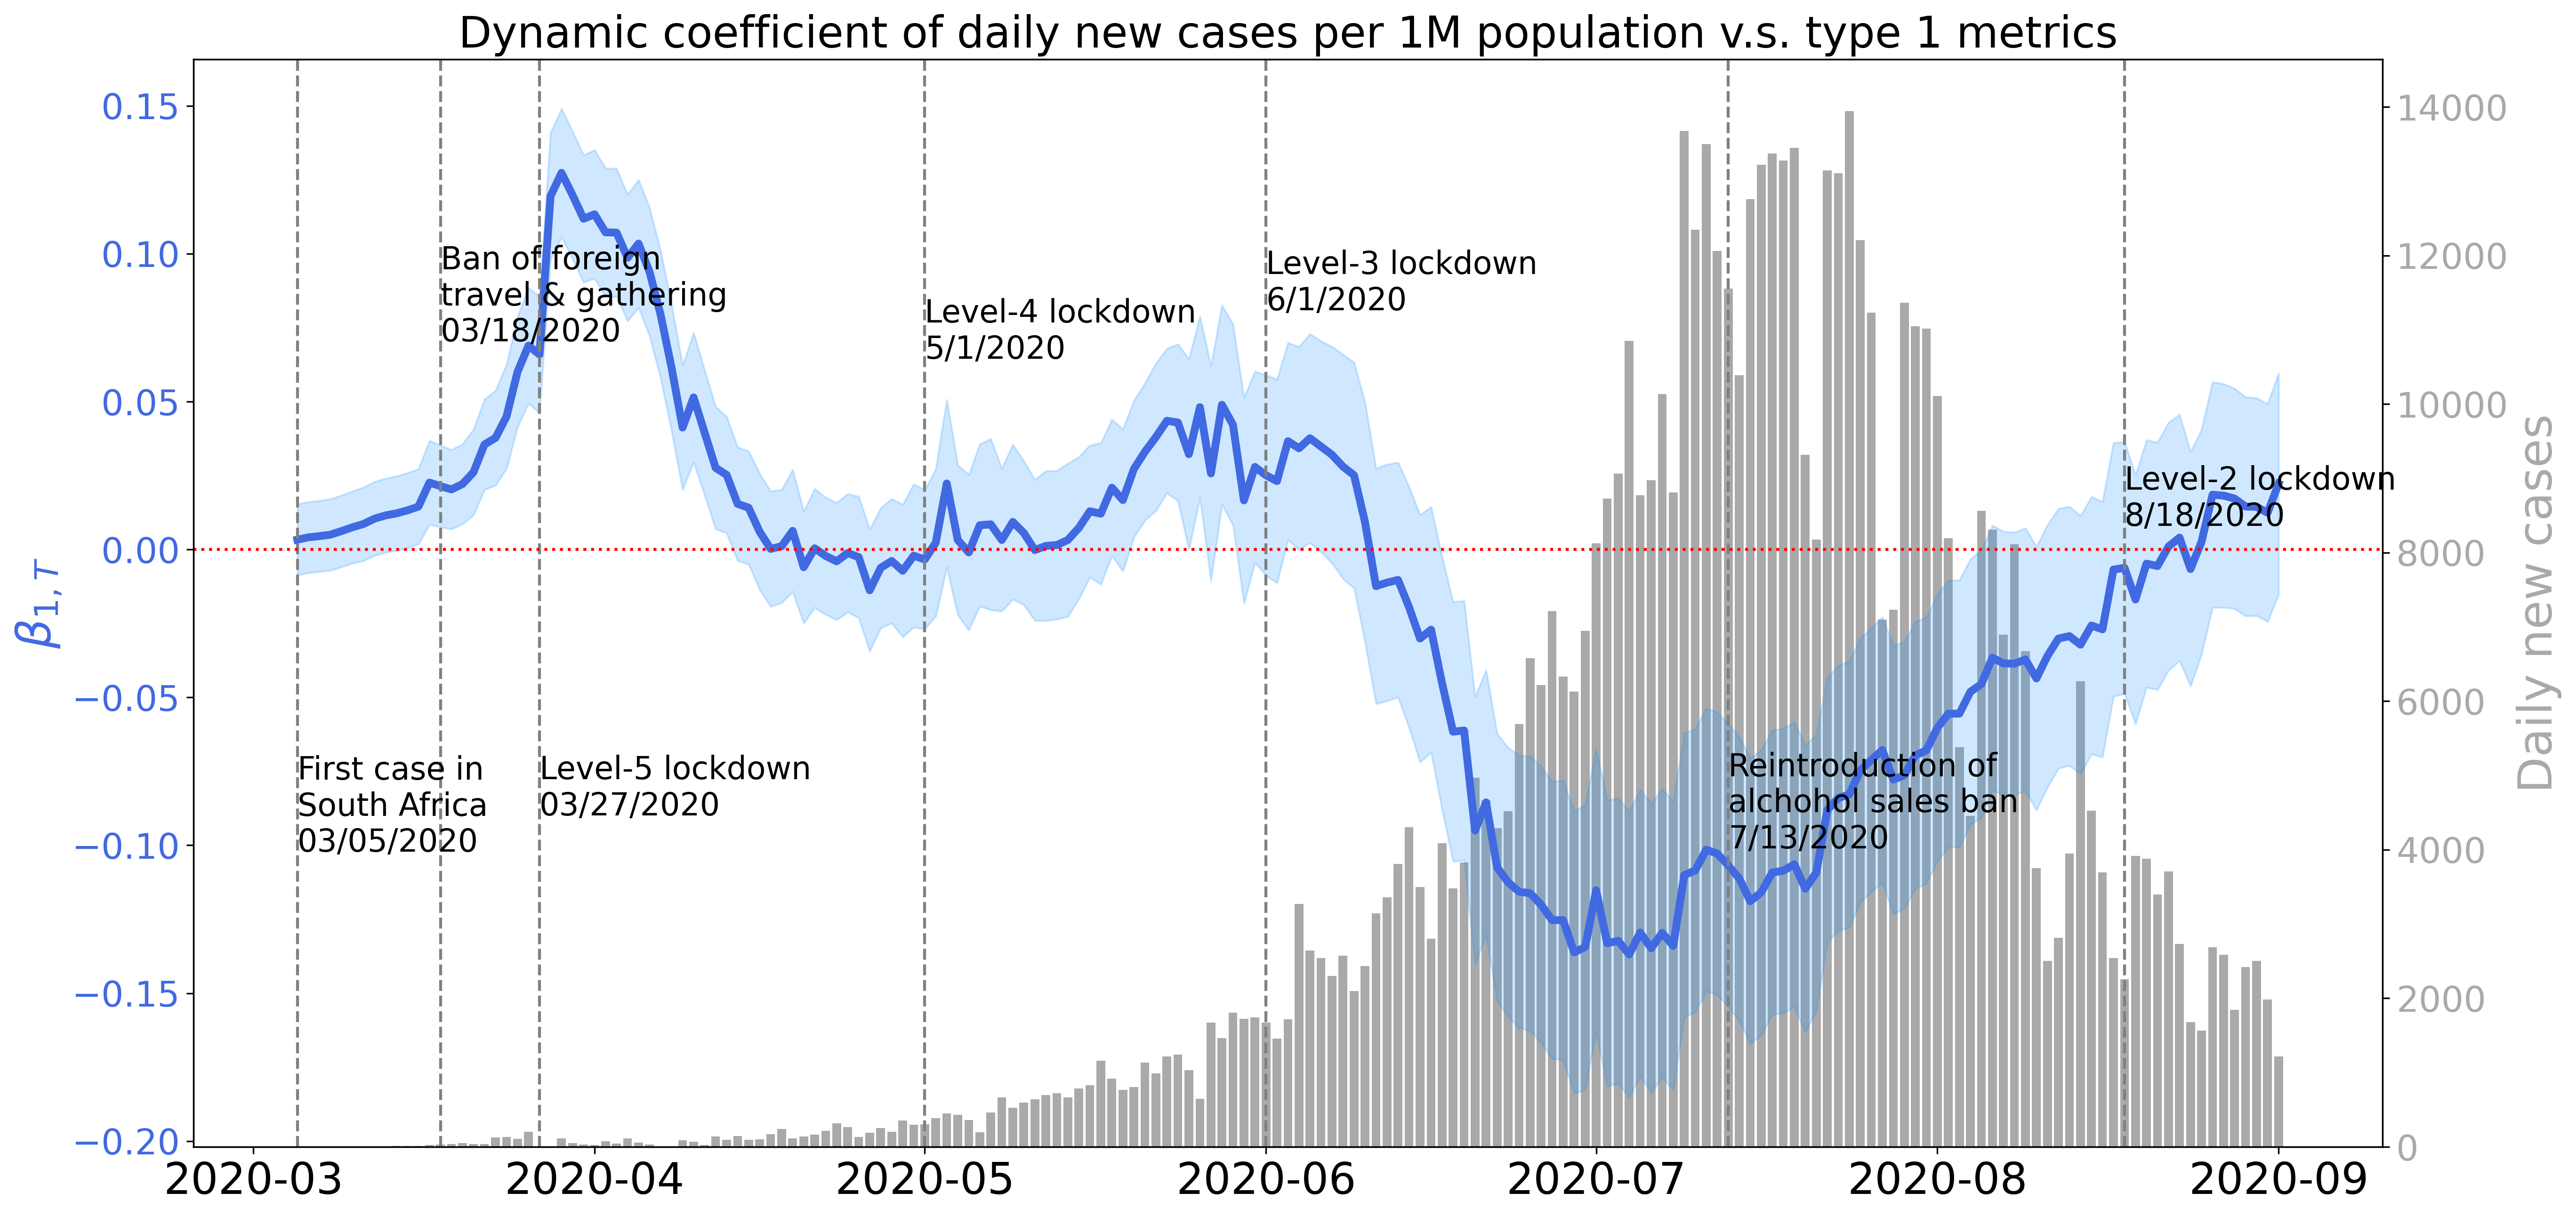

In [78]:
import matplotlib.pyplot as plt
import datetime
import random

val_c = 'Estimate'
err_c = 'Std.Error'
left_y_color = '#1690ff'
val_c_alia = r'$\beta_{1,T}$'

fig, ax1 = plt.subplots(figsize=(20, 10), dpi=300)
line_data = case_inflow_coefs.reset_index()

color = 'royalblue'
ax1.tick_params(axis='x', labelsize=22)
ax1.set_ylabel('%s' % val_c_alia, fontsize=24, color=color)
line1 = ax1.plot(line_data['date_2'], line_data[val_c], color=color, linewidth=4)
ax1.fill_between(line_data['date_2'], line_data[val_c]-line_data[err_c], line_data[val_c]+line_data[err_c], alpha=0.2, color=left_y_color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=18)

max_value = line_data[val_c].max()
min_value = line_data[val_c].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'
ax1.axvline(datetime.datetime(2020,3,5), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,5), random.uniform(0.1,0.2)*min_max_rg+min_value, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,18), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,18), random.uniform(0.7,0.8)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,27), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,27), random.uniform(0.1,0.2)*min_max_rg+min_value, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,5,1), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,5,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,6,1), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,6,1), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,7,13), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,7,13), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,8,18), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,8,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

ax1.axhline(0, linestyle = ':', color='red')

ax3 = ax1.twinx()
color3 = '#a9a9a9'
line_data = line_data.merge(daily_new_cases, how='left', on='date_2')
line3 = ax3.bar(line_data['date_2'], line_data['new_cases'], color=color3)
ax3.tick_params(axis='y', labelcolor=color3, labelsize=18)
ax3.set_ylabel('Daily new cases', fontsize=24, color=color3)

ax1.set_zorder(ax3.get_zorder()+1)
ax1.patch.set_visible(False)

plt.title('Dynamic coefficient of %s v.s. %s' % (response_alias, predictor_alias), fontsize=22)
plt.savefig(f'./Figures/{fig_version}/dynamic_relationships-{response_alias}-{predictor_alias}.png', bbox_inches='tight', dpi=300)

#### P-value

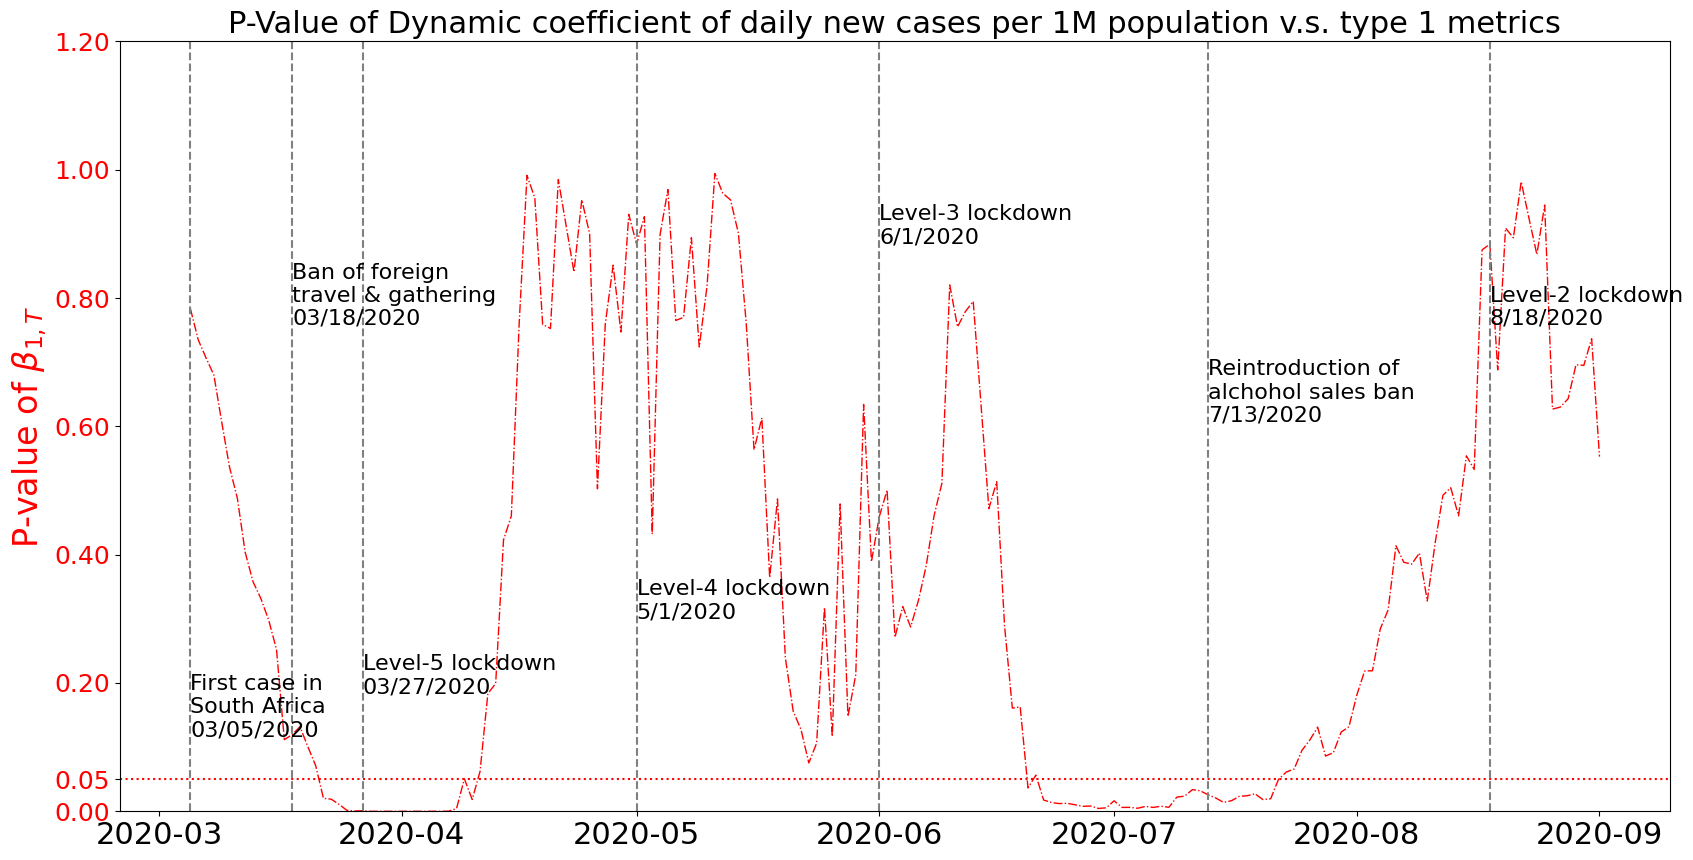

In [79]:
val_c2 = 'P.Value'
val_c_alia = r'$\beta_{1,T}$'
val_c2_alia = 'P-value of %s' % val_c_alia

fig, ax2 = plt.subplots(figsize=(20, 10))
line_data = case_inflow_coefs.reset_index()

color2 = 'red'
ax2.tick_params(axis='x', labelsize=22)
ax2.plot(line_data['date_2'], line_data[val_c2], linestyle='-.', color=color2, linewidth=1)
ax2.axhline(0.05, linestyle=':', color=color2)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=18)
ax2.set_ylabel('%s' % val_c2_alia, fontsize=24, color=color2)
ax2.set_ylim(bottom=0.0)

pv = ax2.get_yticks()
pv = np.append(pv, 0.05)
pvl = pv.tolist()
pvl[-1] = 0.05
ax2.set_yticks(pv)

max_value = line_data[val_c2].max()
min_value = line_data[val_c2].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'
ax2.axvline(datetime.datetime(2020,3,5), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,3,5), random.uniform(0.1,0.2)*min_max_rg+min_value, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,3,18), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,3,18), random.uniform(0.7,0.8)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,3,27), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,3,27), random.uniform(0.1,0.2)*min_max_rg+min_value, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,5,1), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,5,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,6,1), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,6,1), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,7,13), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,7,13), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,8,18), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,8,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

plt.title('P-Value of Dynamic coefficient of %s v.s. %s' % (response_alias, predictor_alias), fontsize=22)
plt.savefig(f'./Figures/{fig_version}/pvalue-{response_alias}-{predictor_alias}.png', bbox_inches='tight', dpi=300)

In [80]:
line_data

date_2  Estimate  Std.Error  P.Value
0   2020-03-05    0.0033     0.0120   0.7834
1   2020-03-06    0.0041     0.0120   0.7348
2   2020-03-07    0.0045     0.0120   0.7065
3   2020-03-08    0.0050     0.0121   0.6798
4   2020-03-09    0.0062     0.0121   0.6068
..         ...       ...        ...      ...
176 2020-08-28    0.0172     0.0372   0.6430
177 2020-08-29    0.0145     0.0370   0.6959
178 2020-08-30    0.0144     0.0368   0.6949
179 2020-08-31    0.0124     0.0368   0.7364
180 2020-09-01    0.0222     0.0374   0.5527

[181 rows x 4 columns]

### Plot case v.s. cross-admin2-bound trips coefs

In [59]:
response = 'log.new_cases.per1M'
predictor = 'l16.log.admin1_inbound_admin2_crossbound_trip_count.per1M'
response_alias = 'daily new cases per 1M population'
predictor_alias = 'type 2 metrics'

In [60]:
case_inflow_coefs = coefs.loc[(coefs['Response'] == response) & (coefs['Predictor'] == predictor)]
# case_inflow_coefs = coefs.loc[(coefs['Response'] == 'log.new_cases.per1M') & (coefs['Predictor'] == 'l7_admin1_inflow_trip_count')]
case_inflow_coefs = case_inflow_coefs[['date_2', 'Estimate', 'Std.Error', 'P.Value']].set_index('date_2')
case_inflow_coefs

Estimate  Std.Error  P.Value
date_2                                  
2020-03-05    0.0222     0.0200   0.2679
2020-03-06    0.0223     0.0200   0.2644
2020-03-07    0.0218     0.0200   0.2764
2020-03-08    0.0217     0.0200   0.2799
2020-03-09    0.0229     0.0201   0.2545
...              ...        ...      ...
2020-08-28   -0.1807     0.0536   0.0008
2020-08-29   -0.1770     0.0534   0.0009
2020-08-30   -0.1808     0.0516   0.0005
2020-08-31   -0.1893     0.0513   0.0002
2020-09-01   -0.2061     0.0512   0.0001

[181 rows x 3 columns]

#### Interpretation results

In [61]:
case_inflow_coefs.loc[(case_inflow_coefs.index >= datetime.datetime(2020,3,22)) & (case_inflow_coefs.index <= datetime.datetime(2020,4,8))].mean()

Estimate     0.004478
Std.Error    0.026039
P.Value      0.660856
dtype: float64

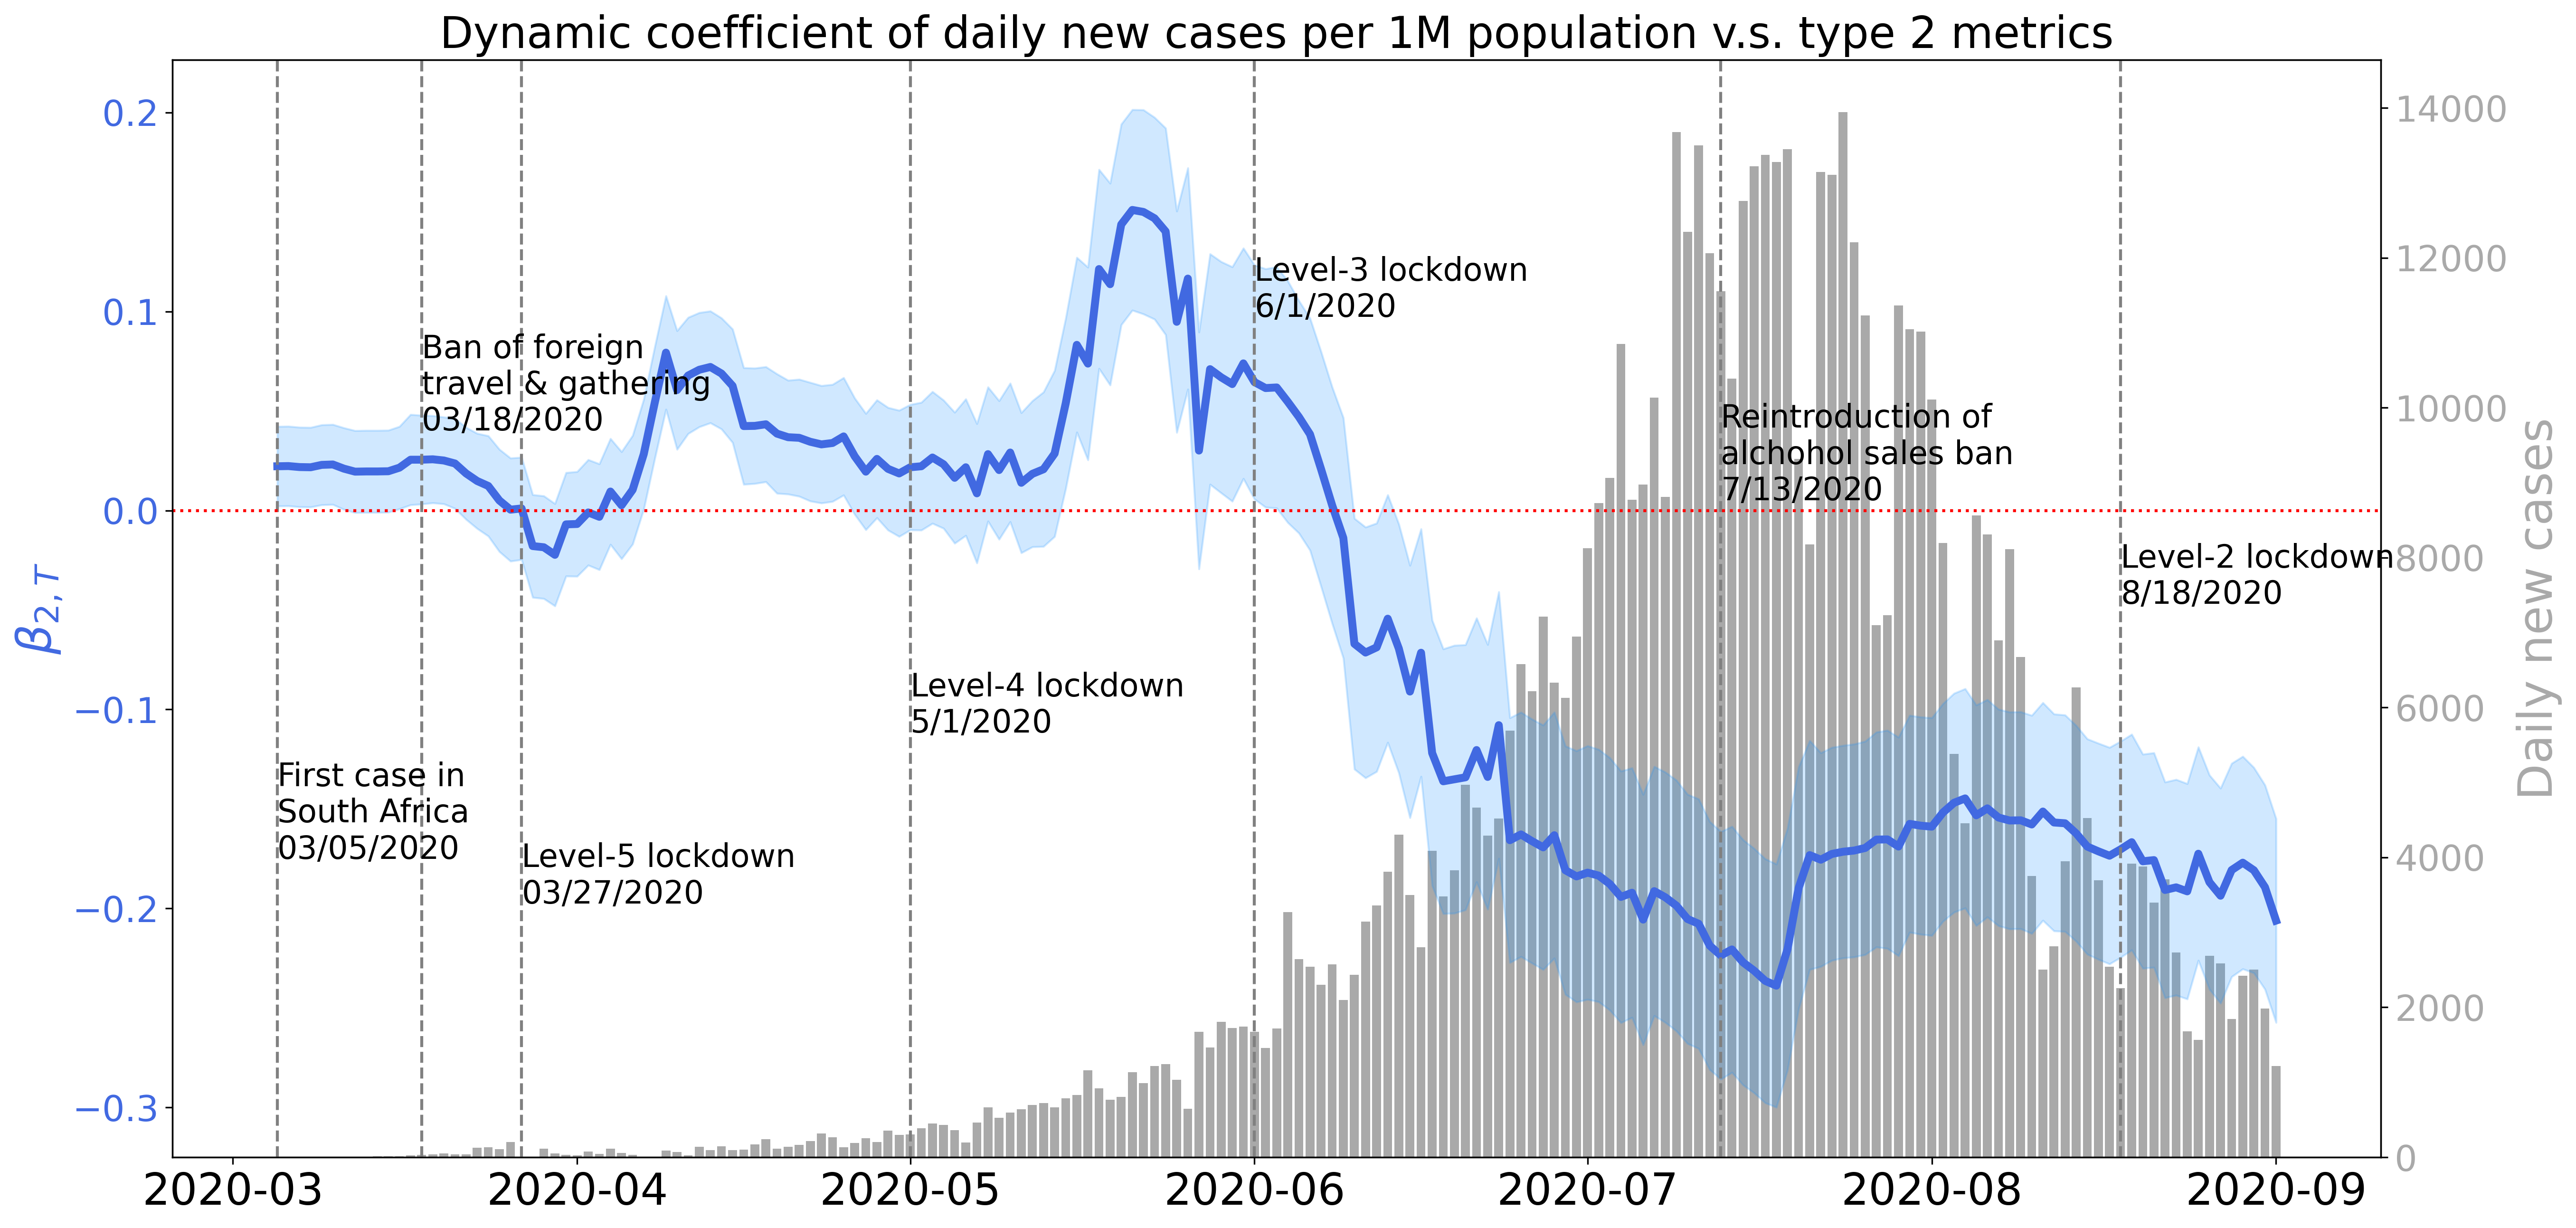

In [62]:
val_c = 'Estimate'
err_c = 'Std.Error'
left_y_color = '#1690ff'
val_c_alia = r'$\beta_{2,T}$'

fig, ax1 = plt.subplots(figsize=(20, 10), dpi=300)
line_data = case_inflow_coefs.reset_index()

color = 'royalblue'
ax1.tick_params(axis='x', labelsize=22)
ax1.set_ylabel('%s' % val_c_alia, fontsize=24, color=color)
line1 = ax1.plot(line_data['date_2'], line_data[val_c], color=color, linewidth=4)
ax1.fill_between(line_data['date_2'], line_data[val_c]-line_data[err_c], line_data[val_c]+line_data[err_c], alpha=0.2, color=left_y_color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=18)

max_value = line_data[val_c].max()
min_value = line_data[val_c].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'
ax1.axvline(datetime.datetime(2020,3,5), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,5), random.uniform(0.1,0.2)*min_max_rg+min_value, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,18), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,18), random.uniform(0.7,0.8)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,27), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,27), random.uniform(0.1,0.2)*min_max_rg+min_value, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,5,1), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,5,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,6,1), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,6,1), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,7,13), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,7,13), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,8,18), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,8,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

ax1.axhline(0, linestyle = ':', color='red')

ax3 = ax1.twinx()
color3 = '#a9a9a9'

line_data = line_data.merge(daily_new_cases, how='left', on='date_2')
line3 = ax3.bar(line_data['date_2'], line_data['new_cases'], color=color3)
ax3.tick_params(axis='y', labelcolor=color3, labelsize=18)
ax3.set_ylabel('Daily new cases', fontsize=24, color=color3)

ax1.set_zorder(ax3.get_zorder()+1)
ax1.patch.set_visible(False)

plt.title('Dynamic coefficient of %s v.s. %s' % (response_alias, predictor_alias), fontsize=22)
plt.savefig('./Figures/%s/dynamic_relationships_%s_%s.png' % (fig_version, response_alias, predictor_alias), bbox_inches='tight', dpi=300)

#### P-value

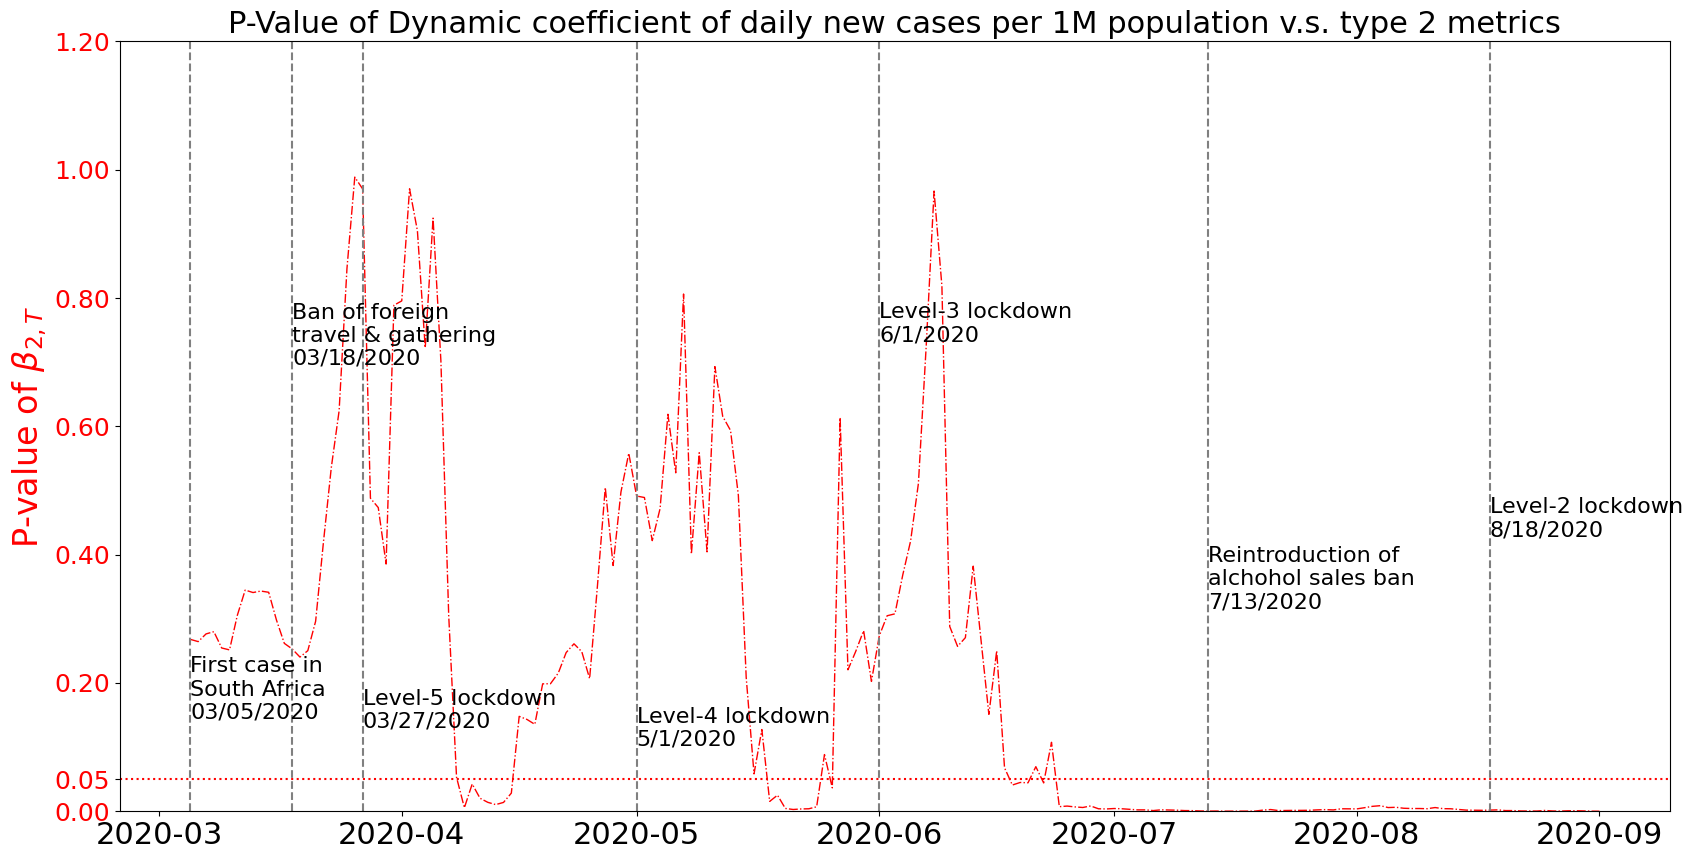

In [63]:
val_c2 = 'P.Value'
val_c_alia = r'$\beta_{2,T}$'
val_c2_alia = 'P-value of %s' % val_c_alia

fig, ax2 = plt.subplots(figsize=(20, 10))
line_data = case_inflow_coefs.reset_index()

color2 = 'red'
ax2.tick_params(axis='x', labelsize=22)
ax2.plot(line_data['date_2'], line_data[val_c2], linestyle='-.', color=color2, linewidth=1)
ax2.axhline(0.05, linestyle=':', color=color2)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=18)
ax2.set_ylabel('%s' % val_c2_alia, fontsize=24, color=color2)
ax2.set_ylim(bottom=0.0)

pv = ax2.get_yticks()
pv = np.append(pv, 0.05)
pvl = pv.tolist()
pvl[-1] = 0.05
ax2.set_yticks(pv)

max_value = line_data[val_c2].max()
min_value = line_data[val_c2].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'
ax2.axvline(datetime.datetime(2020,3,5), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,3,5), random.uniform(0.1,0.2)*min_max_rg+min_value, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,3,18), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,3,18), random.uniform(0.7,0.8)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,3,27), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,3,27), random.uniform(0.1,0.2)*min_max_rg+min_value, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,5,1), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,5,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,6,1), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,6,1), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,7,13), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,7,13), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,8,18), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,8,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

plt.title('P-Value of Dynamic coefficient of %s v.s. %s' % (response_alias, predictor_alias), fontsize=22)
plt.savefig('./Figures/%s/pvalue_%s_%s.png' % (fig_version, response_alias, predictor_alias), bbox_inches='tight', dpi=300)

In [65]:
line_data

date_2  Estimate  Std.Error  P.Value
0   2020-03-05    0.0222     0.0200   0.2679
1   2020-03-06    0.0223     0.0200   0.2644
2   2020-03-07    0.0218     0.0200   0.2764
3   2020-03-08    0.0217     0.0200   0.2799
4   2020-03-09    0.0229     0.0201   0.2545
..         ...       ...        ...      ...
176 2020-08-28   -0.1807     0.0536   0.0008
177 2020-08-29   -0.1770     0.0534   0.0009
178 2020-08-30   -0.1808     0.0516   0.0005
179 2020-08-31   -0.1893     0.0513   0.0002
180 2020-09-01   -0.2061     0.0512   0.0001

[181 rows x 4 columns]

### Plot case v.s. in-bound-admin2 trips coefs

In [82]:
response = 'log.new_cases.per1M'
predictor = 'l22.log.admin2_inbound_trip_count.per1M'
response_alias = 'daily new cases per 1M population'
predictor_alias = 'type 3 metrics'

In [83]:
case_inflow_coefs = coefs.loc[(coefs['Response'] == response) & (coefs['Predictor'] == predictor)]
# case_inflow_coefs = coefs.loc[(coefs['Response'] == 'log.new_cases.per1M') & (coefs['Predictor'] == 'l7_admin1_inflow_trip_count')]
case_inflow_coefs = case_inflow_coefs[['date_2', 'Estimate', 'Std.Error', 'P.Value']].set_index('date_2')
case_inflow_coefs

Estimate  Std.Error  P.Value
date_2                                  
2020-03-05   -0.0276     0.0236   0.2435
2020-03-06   -0.0267     0.0236   0.2594
2020-03-07   -0.0239     0.0237   0.3135
2020-03-08   -0.0228     0.0237   0.3381
2020-03-09   -0.0230     0.0238   0.3348
...              ...        ...      ...
2020-08-28    0.3619     0.0424   0.0000
2020-08-29    0.3735     0.0425   0.0000
2020-08-30    0.3661     0.0422   0.0000
2020-08-31    0.3634     0.0414   0.0000
2020-09-01    0.3575     0.0416   0.0000

[181 rows x 3 columns]

#### Interpretation results

In [84]:
case_inflow_coefs.loc[(case_inflow_coefs.index >= datetime.datetime(2020,3,28)) & (case_inflow_coefs.index <= datetime.datetime(2020,4,8))].mean()

Estimate     0.078342
Std.Error    0.030175
P.Value      0.009933
dtype: float64

In [85]:
case_inflow_coefs.loc[(case_inflow_coefs.index >= datetime.datetime(2020,5,28)) & (case_inflow_coefs.index <= datetime.datetime(2020,7,13))].describe()

Estimate  Std.Error  P.Value
count  47.000000  47.000000     47.0
mean    0.458889   0.053945      0.0
std     0.020997   0.004831      0.0
min     0.417900   0.048600      0.0
25%     0.445900   0.049700      0.0
50%     0.453900   0.052700      0.0
75%     0.475350   0.058200      0.0
max     0.501900   0.063900      0.0

In [86]:
date_start = datetime.datetime(2020,7,14)
date_end = datetime.datetime(2020,8,18)
case_inflow_coefs.loc[(case_inflow_coefs.index >= date_start) & (case_inflow_coefs.index <= date_end)].describe()

Estimate  Std.Error  P.Value
count  36.000000  36.000000     36.0
mean    0.390981   0.044139      0.0
std     0.026223   0.002413      0.0
min     0.359800   0.042100      0.0
25%     0.370925   0.042475      0.0
50%     0.383400   0.042700      0.0
75%     0.410400   0.045575      0.0
max     0.449800   0.048800      0.0

In [71]:
date_start = datetime.datetime(2020,8,1)
date_end = datetime.datetime(2020,9,1)
case_inflow_coefs.loc[(case_inflow_coefs.index >= date_start) & (case_inflow_coefs.index <= date_end)].describe()

Estimate  Std.Error  P.Value
count  32.000000  32.000000     32.0
mean    0.371334   0.042356      0.0
std     0.008217   0.000353      0.0
min     0.357500   0.041400      0.0
25%     0.365300   0.042200      0.0
50%     0.370650   0.042450      0.0
75%     0.375000   0.042600      0.0
max     0.387500   0.042900      0.0

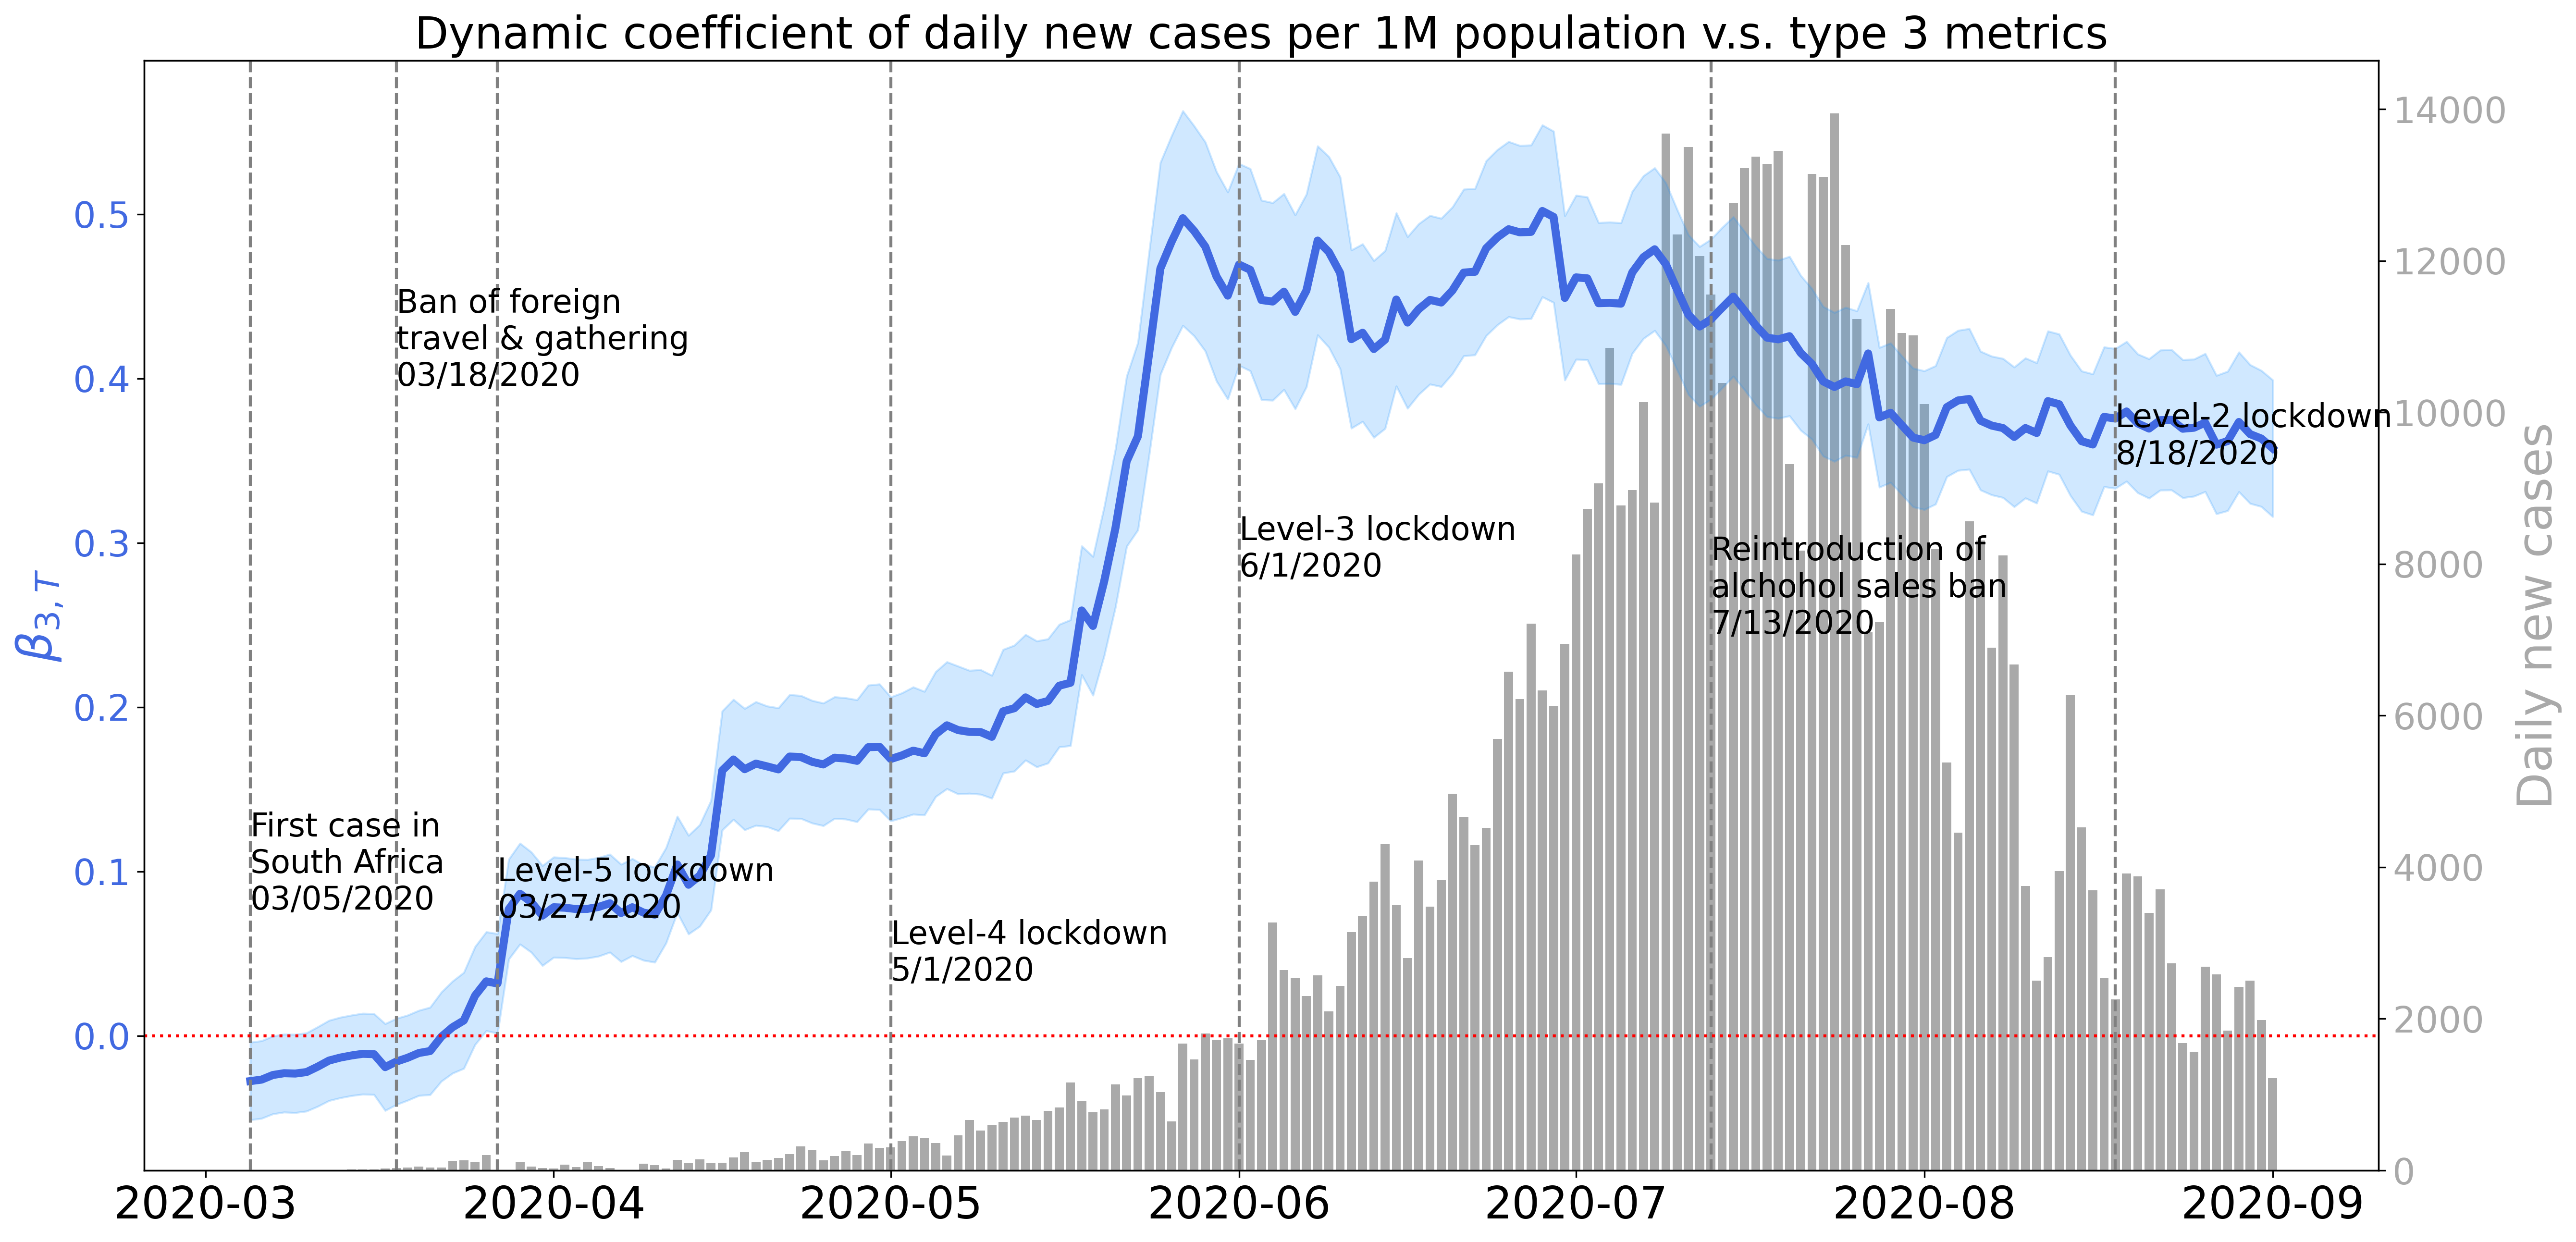

In [72]:
import matplotlib.pyplot as plt
import datetime
import random

val_c = 'Estimate'
err_c = 'Std.Error'
left_y_color = '#1690ff'
val_c_alia = r'$\beta_{3,T}$'

fig, ax1 = plt.subplots(figsize=(20, 10), dpi=300)
line_data = case_inflow_coefs.reset_index()

color = 'royalblue'
ax1.tick_params(axis='x', labelsize=22)
ax1.set_ylabel('%s' % val_c_alia, fontsize=24, color=color)
line1 = ax1.plot(line_data['date_2'], line_data[val_c], color=color, linewidth=4)
ax1.fill_between(line_data['date_2'], line_data[val_c]-line_data[err_c], line_data[val_c]+line_data[err_c], alpha=0.2, color=left_y_color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=18)

max_value = line_data[val_c].max()
min_value = line_data[val_c].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'
ax1.axvline(datetime.datetime(2020,3,5), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,5), random.uniform(0.1,0.2)*min_max_rg+min_value, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,18), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,18), random.uniform(0.7,0.8)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,3,27), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,3,27), random.uniform(0.1,0.2)*min_max_rg+min_value, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,5,1), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,5,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,6,1), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,6,1), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,7,13), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,7,13), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax1.axvline(datetime.datetime(2020,8,18), linestyle='dashed', color=vline_color)
ax1.text(datetime.datetime(2020,8,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

ax1.axhline(0, linestyle = ':', color='red')

ax3 = ax1.twinx()
color3 = '#a9a9a9'

line_data = line_data.merge(daily_new_cases, how='left', on='date_2')
line3 = ax3.bar(line_data['date_2'], line_data['new_cases'], color=color3)
ax3.tick_params(axis='y', labelcolor=color3, labelsize=18)
ax3.set_ylabel('Daily new cases', fontsize=24, color=color3)

ax1.set_zorder(ax3.get_zorder()+1)
ax1.patch.set_visible(False)

plt.title('Dynamic coefficient of %s v.s. %s' % (response_alias, predictor_alias), fontsize=22)
plt.savefig('./Figures/%s/dynamic_relationships_%s_%s.png' % (fig_version, response_alias, predictor_alias), bbox_inches='tight', dpi=300)

#### P-value

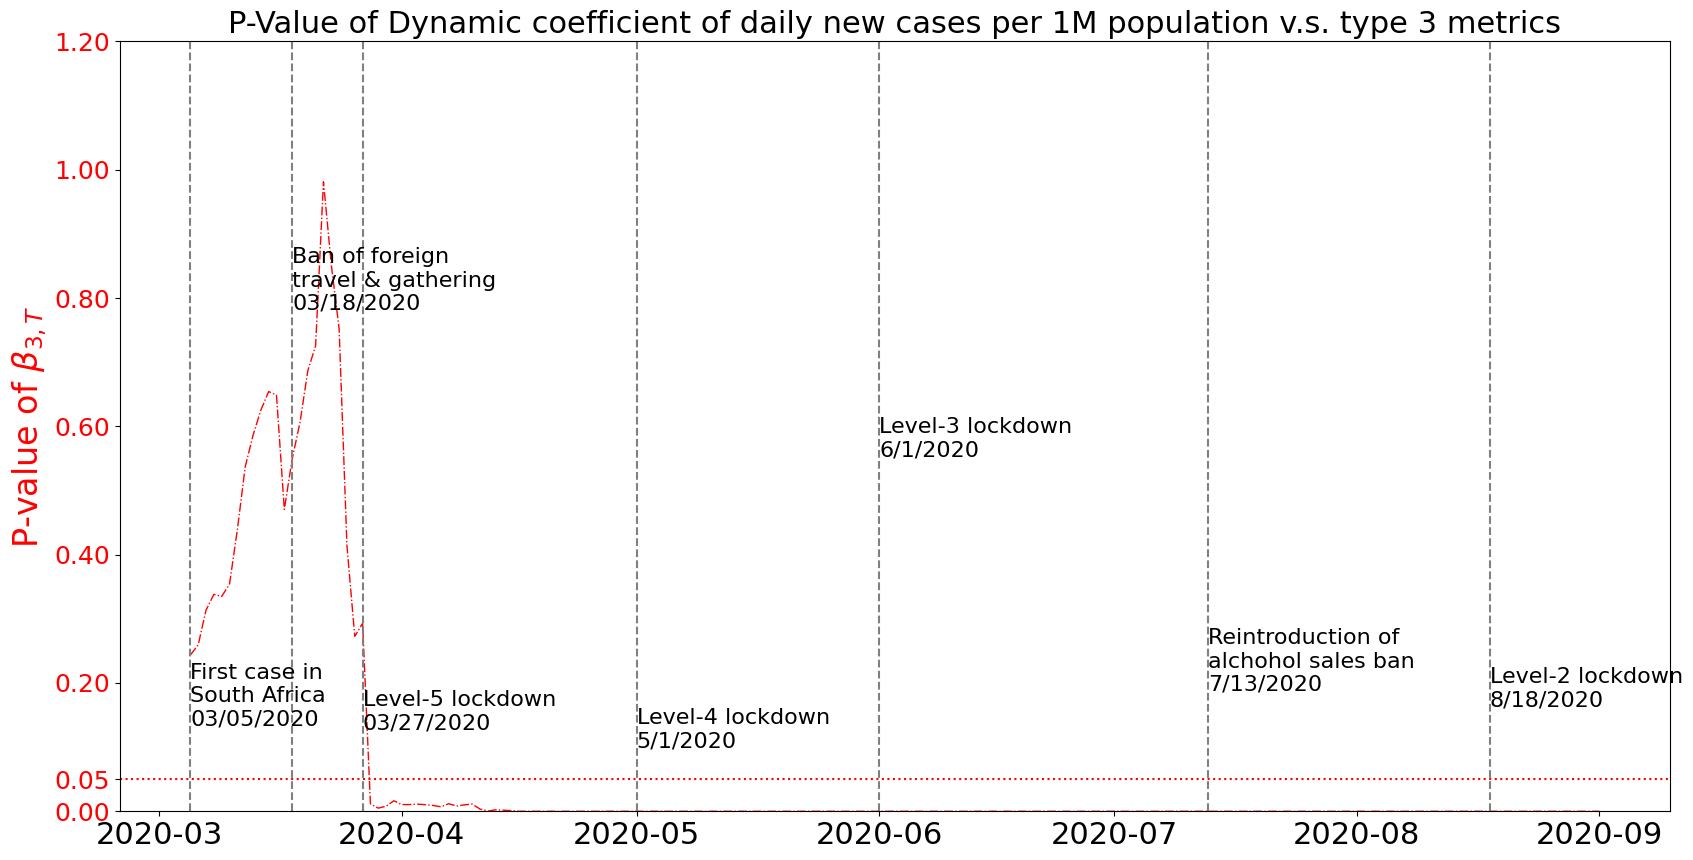

In [73]:
val_c2 = 'P.Value'
val_c_alia = r'$\beta_{3,T}$'
val_c2_alia = 'P-value of %s' % val_c_alia

fig, ax2 = plt.subplots(figsize=(20, 10))
line_data = case_inflow_coefs.reset_index()

color2 = 'red'
ax2.tick_params(axis='x', labelsize=22)
ax2.plot(line_data['date_2'], line_data[val_c2], linestyle='-.', color=color2, linewidth=1)
ax2.axhline(0.05, linestyle=':', color=color2)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=18)
ax2.set_ylabel('%s' % val_c2_alia, fontsize=24, color=color2)
ax2.set_ylim(bottom=0.0)

pv = ax2.get_yticks()
pv = np.append(pv, 0.05)
pvl = pv.tolist()
pvl[-1] = 0.05
ax2.set_yticks(pv)

max_value = line_data[val_c2].max()
min_value = line_data[val_c2].min()
min_max_rg = max_value - min_value

vline_tag_size = 16
vline_color = 'grey'
ax2.axvline(datetime.datetime(2020,3,5), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,3,5), random.uniform(0.1,0.2)*min_max_rg+min_value, 'First case in \nSouth Africa\n03/05/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,3,18), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,3,18), random.uniform(0.7,0.8)*min_max_rg+min_value, 'Ban of foreign \ntravel & gathering \n03/18/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,3,27), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,3,27), random.uniform(0.1,0.2)*min_max_rg+min_value, 'Level-5 lockdown\n03/27/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,5,1), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,5,1), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-4 lockdown\n5/1/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,6,1), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,6,1), max_value-random.uniform(0.1,0.8)*min_max_rg, 'Level-3 lockdown\n6/1/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,7,13), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,7,13), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Reintroduction of \nalchohol sales ban\n7/13/2020', fontsize=vline_tag_size, rotation=0)
ax2.axvline(datetime.datetime(2020,8,18), linestyle='dashed', color=vline_color)
ax2.text(datetime.datetime(2020,8,18), random.uniform(0.1,0.8)*min_max_rg+min_value, 'Level-2 lockdown\n8/18/2020', fontsize=vline_tag_size, rotation=0)

plt.title('P-Value of Dynamic coefficient of %s v.s. %s' % (response_alias, predictor_alias), fontsize=22)
plt.savefig('./Figures/%s/pvalue_%s_%s.png' % (fig_version, response_alias, predictor_alias), bbox_inches='tight', dpi=300)

In [74]:
line_data

date_2  Estimate  Std.Error  P.Value
0   2020-03-05   -0.0276     0.0236   0.2435
1   2020-03-06   -0.0267     0.0236   0.2594
2   2020-03-07   -0.0239     0.0237   0.3135
3   2020-03-08   -0.0228     0.0237   0.3381
4   2020-03-09   -0.0230     0.0238   0.3348
..         ...       ...        ...      ...
176 2020-08-28    0.3619     0.0424   0.0000
177 2020-08-29    0.3735     0.0425   0.0000
178 2020-08-30    0.3661     0.0422   0.0000
179 2020-08-31    0.3634     0.0414   0.0000
180 2020-09-01    0.3575     0.0416   0.0000

[181 rows x 4 columns]